# Análise exploratória dos dados
_EDA - Exploratory Data Analysis_

---

## Sumário

1. **Importação de bibliotecas**
2. **Carregamento das bases**
3. **Divisão da base em treino, validação e teste**
    - 3.1. Salvando os dataframes em formato parquet
4. **Análise do dataframe _df_train_val_**
    - 4.1. Correção e ajuste das variáveis
    - 4.2. Análise das medidas estatísticas
        - 4.2.1. Análise descritiva das variáveis
        - 4.2.2. Distribuição dos dados em gráfico boxplot
        - 4.2.3. Análise dos outliers identificados
        - 4.2.4. Distribuição dos dados em gráfico histograma
        - 4.2.5. Distribuição dos dados em gráfico de barras (countplot)
5. **Análise exploratória dos dados**
    - 5.1. Distribuição das transações segmentadas por legítimas e fraudulentas
    - 5.2. Distribuição das transações por comportamento temporal e taxa de fraude
        - 5.2.1. Distribuição das transações por ano e a taxa de fraude
        - 5.2.2. Distribuição das transações por mês e a taxa de fraude
        - 5.2.3. Distribuição das transações por dia da semana e a taxa de fraude
        - 5.2.4. Distribuição das transações por hora e a taxa de fraude
    - 5.3. Distribuição das transações por localização do comerciante
        - 5.3.1. Distribuição das transações fraudulentas por cidade e estado/país do comerciante
        - 5.3.2. Distribuição das transações legítimas por cidade e estado/país do comerciante
    - 5.4. Distribuição das transações por forma de pagamento e a taxa de fraude
        - 5.4.1. Distribuição das transações por bandeira do cartão e a taxa de fraude
        - 5.4.2. Distribuição das transações por tipo de cartão e a taxa de fraude
    - 5.5. Distribuição das transações por faixa etária e taxa de fraude
    - 5.6. Distribuição das transações por faixa de pontuação de crédito e taxa de fraude
    - 5.7. Distribuição das transações por indicadores e taxa de fraude
    - 5.8. Distribuição das transações por erros de transação e taxa de fraude
    - 5.9. Correlação entre as variáveis numéricas



<br>

---

<br>

## 1. Importação de bibliotecas

In [2]:
# Importação de pacotes e definição de parâmetros globais

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import gc
import os
import textwrap

from sklearn.model_selection import train_test_split
from matplotlib.colors import LinearSegmentedColormap

In [3]:
# Configurações para exibição de dados no Jupyter Notebook

# Configurar para exibir todas as colunas do Dataframe
pd.set_option('display.max_columns', None)

# Configurar para exibir o conteúdo completo das colunas
pd.set_option('display.max_colwidth', None)

# Configurar a supressão de mensagens de aviso durante a execução
warnings.filterwarnings('ignore')

# Configurar estilo dos gráficos do seaborn
sns.set_style('whitegrid')

## 2. Carregamento da base

In [4]:
# Efetuando a limpeza da memória antes do carregamento dos dados
print(f'\nQuantidade de objetos removidos da memória: {gc.collect()}')


Quantidade de objetos removidos da memória: 0


In [5]:
# Caminho do arquivo de dados
caminho = f'dados/ABT'

# Criando um dataframe a partir dos arquivos no diretório de dados
df = pd.read_parquet(caminho, engine='pyarrow')

In [6]:
df.head(10)

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors,id_card,client_id_card,card_brand,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web,id_client,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards,code,description,transaction_id,is_fraud
0,7475806,2010-01-01 09:05:00,1840,4568,$2.02,Swipe Transaction,35451,Beaverton,OR,97005.0,5812,None,4568,1840,Visa,Debit (Prepaid),4733359418335581,09/2021,67,YES,2,$4,09/2004,2008,No,1840,46,71,1974,2,Female,576 Martin Luther King Street,45.49,-122.80,$21702,$44249,$103229,706,5,5812,Eating Places and Restaurants,7475806.0,No
1,7477473,2010-01-01 15:08:00,538,4161,$7.48,Swipe Transaction,26810,Winterville,NC,28590.0,5541,None,4161,538,Mastercard,Debit,5885105668024939,12/2014,750,YES,2,$6993,08/2005,2016,No,538,66,69,1954,2,Female,7888 Fourth Street,35.30,-77.15,$14844,$30265,$36789,814,4,5541,Service Stations,7477473.0,No
2,7477784,2010-01-01 16:18:00,724,2876,$1.70,Swipe Transaction,59935,Cushing,OK,74023.0,5499,None,2876,724,Mastercard,Debit,5832356224925490,06/2024,245,YES,2,$16476,05/2005,2008,No,724,45,72,1974,5,Female,819 El Camino Boulevard,35.97,-96.76,$17237,$35142,$107898,731,4,5499,Miscellaneous Food Stores,NaN,None
3,7477811,2010-01-01 16:25:00,377,1175,$-53.00,Swipe Transaction,43293,Withee,WI,54498.0,5499,None,1175,377,Mastercard,Debit,5009400051376027,11/2023,417,YES,1,$30403,02/2009,2014,No,377,80,67,1940,1,Female,305 Pine Avenue,47.39,-122.26,$24884,$39110,$363,750,5,5499,Miscellaneous Food Stores,NaN,None
4,7478410,2010-01-01 18:55:00,1362,2145,$-295.00,Swipe Transaction,96185,Bladensburg,MD,20710.0,7011,None,2145,1362,Mastercard,Debit,5566695688917047,03/2017,309,NO,2,$29708,03/2007,2009,No,1362,58,67,1962,1,Male,3385 Hill Lane,38.78,-77.27,$35563,$72510,$44317,727,4,7011,"Lodging - Hotels, Motels, Resorts",NaN,None
5,7478830,2010-01-01 21:25:00,1466,5884,$17.59,Online Transaction,16798,ONLINE,None,NaN,4121,None,5884,1466,Mastercard,Debit,5946854129119703,09/2020,405,YES,1,$1866,12/2007,2014,No,1466,36,75,1983,4,Female,3194 Norfolk Street,38.64,-75.61,$17624,$35933,$23451,812,2,4121,Taxicabs and Limousines,NaN,None
6,7479105,2010-01-01 23:02:00,1693,5940,$4.33,Online Transaction,85247,ONLINE,None,NaN,5815,None,5940,1693,Mastercard,Debit,5128104617797218,03/2017,726,YES,1,$33506,12/2008,2011,No,1693,36,69,1983,4,Female,478 East Drive,33.61,-111.89,$36300,$74016,$85204,702,2,5815,"Digital Goods - Media, Books, Apps",7479105.0,No
7,7480284,2010-01-02 11:11:00,1674,2873,$27.78,Swipe Transaction,60569,Jonesboro,AR,72401.0,5300,None,2873,1674,Amex,Credit,366520954874839,05/2022,447,YES,2,$8800,05/2005,2011,No,1674,70,64,1949,4,Male,5073 Wessex Avenue,35.49,-90.35,$14172,$26858,$11245,712,2,5300,Wholesale Clubs,7480284.0,No
8,7480339,2010-01-02 11:27:00,1070,4138,$35.20,Swipe Transaction,99256,Marion,IA,52302.0,5411,None,4138,1070,Mastercard,Debit,5588241759620390,08/2022,902,YES,1,$28666,08/2004,2010,No,1070,61,65,1958,11,Male,841 Wessex Boulevard,42.03,-91.58,$25275,$51528,$58509,745,6,5411,"Grocery Stores, Supermarkets",NaN,None
9,7480412,2010-01-02 11:46:00,509,4588,$5.54,Swipe Transaction,60569,Charmco,WV,25958.0,5300,None,4588,509,Visa,Debit,4262181069766792,07/2022,519,YES,1,$12721,09/2005,2015,No,509,33,66,1986,7,Male,239 Sussex Drive,38.41,-82.43,$21842,$44534,$107410,702,4,5300,Wholesale Clubs,7480412.0,No


## 3. Divisão da base em treino, validação e teste

In [7]:
# Criando os dataframes com base no target 'is_fraud'

# DataFrame de treino e validação (valores 'Yes' e 'No')
df_train_val = df[df['is_fraud'].isin(['Yes', 'No'])].copy()

# DataFrame de teste (valores None)
df_test = df[df['is_fraud'].isnull()].copy()

In [8]:
# Dividindo o dataframe de treino e validação, mantendo a proporção das classes do target 'is_fraud'
df_train, df_val = train_test_split(
    df_train_val, test_size=0.2, random_state=42, stratify=df_train_val['is_fraud']
)

In [9]:
# Exibindo a quantidade de linhas e colunas dos dataframes

# Criação de um dicionário com os dataframes e seus respectivos nomes
dfs = {
    'df_train': df_train,
    'df_val': df_val,
    'df_test': df_test,
}

# Iteração sobre o dicionário para exibir o nome e as dimensões dos dataframes
print(f'\nVOLUMETRIA')
for nome, df in dfs.items():
    print(f'\n{nome}')
    print(f'-'*45)
    print(f'Quantidade de linhas (registros):  {df.shape[0]:,}')
    print(f'Quantidade de colunas (variáveis): {df.shape[1]:,}')  


VOLUMETRIA

df_train
---------------------------------------------
Quantidade de linhas (registros):  3,566,068
Quantidade de colunas (variáveis): 43

df_val
---------------------------------------------
Quantidade de linhas (registros):  891,518
Quantidade de colunas (variáveis): 43

df_test
---------------------------------------------
Quantidade de linhas (registros):  2,194,300
Quantidade de colunas (variáveis): 43


### 3.1. Salvando os dataframes em formato parquet

In [10]:
# Iteração sobre o dicionário para exportação dos dataframes em formato parquet
for nome, df in dfs.items():
    
    # Diretório onde os dados serão salvos
    caminho = f'dados/dados_parquet/'
    
    # Cria o diretório se não existir
    os.makedirs(caminho, exist_ok=True)
    
    try:      
        # Exportar para Parquet
        df.to_parquet(caminho + nome + '.parquet', engine='pyarrow', index=False)
        
        # Valida a quantidade de linhas e colunas
        print(f'\nO {nome} possui {df.shape[0]:,} linhas e {df.shape[1]:,} colunas')
    except Exception as e:
        print(f'\nErro ao exportar {nome}:\n {e}')


O df_train possui 3,566,068 linhas e 43 colunas

O df_val possui 891,518 linhas e 43 colunas

O df_test possui 2,194,300 linhas e 43 colunas


## 4. Análise do dataframe _df_train_val_

In [11]:
# Exibindo a quantidade de linhas e colunas do dataframe

print(f'\nVOLUMETRIA\n')
print(f'Quantidade de linhas (registros):  {df_train_val.shape[0]:,}')
print(f'Quantidade de colunas (variáveis): {df_train_val.shape[1]:,}')


VOLUMETRIA

Quantidade de linhas (registros):  4,457,586
Quantidade de colunas (variáveis): 43


In [12]:
df_train_val.head(10)

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors,id_card,client_id_card,card_brand,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web,id_client,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards,code,description,transaction_id,is_fraud
0,7475806,2010-01-01 09:05:00,1840,4568,$2.02,Swipe Transaction,35451,Beaverton,OR,97005.0,5812,None,4568,1840,Visa,Debit (Prepaid),4733359418335581,09/2021,67,YES,2,$4,09/2004,2008,No,1840,46,71,1974,2,Female,576 Martin Luther King Street,45.49,-122.80,$21702,$44249,$103229,706,5,5812,Eating Places and Restaurants,7475806.0,No
1,7477473,2010-01-01 15:08:00,538,4161,$7.48,Swipe Transaction,26810,Winterville,NC,28590.0,5541,None,4161,538,Mastercard,Debit,5885105668024939,12/2014,750,YES,2,$6993,08/2005,2016,No,538,66,69,1954,2,Female,7888 Fourth Street,35.30,-77.15,$14844,$30265,$36789,814,4,5541,Service Stations,7477473.0,No
6,7479105,2010-01-01 23:02:00,1693,5940,$4.33,Online Transaction,85247,ONLINE,None,NaN,5815,None,5940,1693,Mastercard,Debit,5128104617797218,03/2017,726,YES,1,$33506,12/2008,2011,No,1693,36,69,1983,4,Female,478 East Drive,33.61,-111.89,$36300,$74016,$85204,702,2,5815,"Digital Goods - Media, Books, Apps",7479105.0,No
7,7480284,2010-01-02 11:11:00,1674,2873,$27.78,Swipe Transaction,60569,Jonesboro,AR,72401.0,5300,None,2873,1674,Amex,Credit,366520954874839,05/2022,447,YES,2,$8800,05/2005,2011,No,1674,70,64,1949,4,Male,5073 Wessex Avenue,35.49,-90.35,$14172,$26858,$11245,712,2,5300,Wholesale Clubs,7480284.0,No
9,7480412,2010-01-02 11:46:00,509,4588,$5.54,Swipe Transaction,60569,Charmco,WV,25958.0,5300,None,4588,509,Visa,Debit,4262181069766792,07/2022,519,YES,1,$12721,09/2005,2015,No,509,33,66,1986,7,Male,239 Sussex Drive,38.41,-82.43,$21842,$44534,$107410,702,4,5300,Wholesale Clubs,7480412.0,No
11,7482356,2010-01-02 20:04:00,1936,5914,$7.45,Swipe Transaction,21739,Richmond,VT,5477.0,5300,None,5914,1936,Visa,Debit,4653215018449189,09/2014,624,YES,1,$27006,12/2007,2007,No,1936,86,68,1933,7,Female,406 El Camino Boulevard,44.40,-73.00,$26951,$35685,$1135,714,5,5300,Wholesale Clubs,7482356.0,No
14,7482814,2010-01-02 23:36:00,1896,4974,$16.08,Swipe Transaction,60569,Plymouth,MI,48170.0,5300,None,4974,1896,Visa,Credit,4468355695964457,12/2023,955,YES,1,$14000,10/2002,2008,No,1896,50,79,1969,9,Female,6695 River Lane,41.91,-83.38,$19736,$40246,$74352,641,5,5300,Wholesale Clubs,7482814.0,No
16,7484660,2010-01-03 13:14:00,1857,5089,$39.77,Swipe Transaction,91128,Morris Plains,NJ,7950.0,5411,None,5089,1857,Mastercard,Credit,5571571366314376,07/2024,126,YES,1,$27700,10/2007,2013,No,1857,32,66,1987,8,Male,4063 Burns Boulevard,40.77,-74.39,$47698,$97248,$197100,775,5,5411,"Grocery Stores, Supermarkets",7484660.0,No
18,7486009,2010-01-03 18:19:00,1079,5826,$188.80,Swipe Transaction,5373,Rockville Centre,NY,11570.0,4900,None,5826,1079,Amex,Credit,362822137135948,10/2022,44,YES,1,$13400,12/2005,2010,No,1079,65,60,1954,11,Female,422 Madison Lane,40.66,-73.63,$48994,$103294,$39076,831,3,4900,"Utilities - Electric, Gas, Water, Sanitary",7486009.0,No
20,7487202,2010-01-04 07:35:00,1786,5463,$10.28,Swipe Transaction,60354,Louisville,OH,44641.0,5411,None,5463,1786,Mastercard,Credit,5639561447744152,11/2020,247,YES,1,$18400,11/2006,2014,No,1786,48,63,1971,3,Female,7554 Sixth Street,40.83,-81.26,$18936,$38611,$93255,755,5,5411,"Grocery Stores, Supermarkets",7487202.0,No


In [13]:
# Função para geração de um dataframe de metadados

def gerar_metadados(dataframe):
    '''
    Gera um dataframe contendo metadados das colunas do dataframe fornecido.

    :param dataframe: Dataframe
        DataFrame para o qual os metadados serão gerados.
    :return: DataFrame
        DataFrame contendo os metadados.
    '''
    
    # Calculando as métricas
    metadados = pd.DataFrame({
        'Variável': dataframe.columns,
        'Tipo': dataframe.dtypes,
        'Qtde de nulos': dataframe.isnull().sum(),
        '% de nulos': dataframe.isnull().mean() * 100,
        'Cardinalidade': dataframe.nunique()
    })

    # Ordenando o DataFrame pelos valores de 'Qtde de nulos' em ordem decrescente
    metadados = metadados \
        .sort_values(by='Qtde de nulos', ascending=False) \
        .reset_index(drop=True)
    
    # Arredondando a coluna '% de nulos' para duas casas decimais
    metadados['% de nulos'] = metadados['% de nulos'].round(2)

    return metadados

In [14]:
# Exibindo os metadados do dataframe

gerar_metadados(df_train_val)

,Variável,Tipo,Qtde de nulos,% de nulos,Cardinalidade
0,errors,object,4386447,98.40,22
1,zip,float64,554327,12.44,23127
2,merchant_state,object,524586,11.77,191
3,client_id,int32,0,0.00,1219
4,date,datetime64[ns],0,0.00,2685814
5,card_id,int32,0,0.00,4070
6,amount,object,0,0.00,55649
7,merchant_id,int32,0,0.00,53024
8,use_chip,object,0,0.00,3
9,merchant_city,object,0,0.00,11528


### 4.1. Correção e ajuste das variáveis

- Variáveis **amount**, **credit_limit**, **per_capita_income**, **yearly_income** e **total_debt**

In [15]:
# Função para limpar e converter colunas monetárias

def limpar_e_converter_monetarios(dataframe, colunas):
    '''
    Limpa e converte as colunas monetárias do dataframe fornecido.

    :param dataframe: DataFrame
        DataFrame a ser limpo e convertido.
    :param colunas: List
        Lista de colunas a serem limpadas e convertidas.
    :return: DataFrame  
        DataFrame com as colunas limpas e convertidas.
    '''
    
    # Expressão regular para remover símbolos de dólar e vírgulas
    for coluna in colunas:
        # Remover '$' e ',' usando regex e converter para float
        dataframe[coluna] = dataframe[coluna].replace({'\$': '', ',': ''}, regex=True)
        # Convertendo para float, valores não convertíveis se tornam NaN
        dataframe[coluna] = pd.to_numeric(dataframe[coluna], errors='coerce').astype(float)

    return dataframe

In [16]:
# Lista de colunas monetárias
colunas_monetarias = ['amount', 'credit_limit', 'per_capita_income', 'yearly_income', 'total_debt']

# Aplicando a função para limpar e converter as colunas monetárias
df_train_val = limpar_e_converter_monetarios(df_train_val, colunas_monetarias)

- Variável **errors**

In [17]:
# Exibindo os valores únicos da coluna 'errors'
df_train_val['errors'].unique()

array([None, 'Insufficient Balance',
       'Bad Card Number,Insufficient Balance', 'Bad PIN',
       'Bad Expiration', 'Technical Glitch', 'Bad CVV', 'Bad Card Number',
       'Bad Zipcode', 'Bad Expiration,Technical Glitch',
       'Bad PIN,Insufficient Balance', 'Bad CVV,Insufficient Balance',
       'Insufficient Balance,Technical Glitch',
       'Bad Expiration,Insufficient Balance', 'Bad Expiration,Bad CVV',
       'Bad Card Number,Bad Expiration,Insufficient Balance',
       'Bad Card Number,Bad Expiration', 'Bad PIN,Technical Glitch',
       'Bad Card Number,Bad CVV', 'Bad CVV,Technical Glitch',
       'Bad Card Number,Technical Glitch',
       'Bad Zipcode,Insufficient Balance', 'Bad Zipcode,Technical Glitch'],
      dtype=object)

In [18]:
# Preenchendo os valores nulos da coluna 'errors' com 'no errors'
df_train_val['errors'].fillna('no errors', inplace=True)

- Variáveis **merchant_state** e **zip**

In [19]:
# Preenchendo os valores nulos da coluna 'merchant_state' com 'ONLINE' 
# de acordo com o valor 'ONLINE' da coluna 'merchant_city'
df_train_val.loc[df_train_val['merchant_city'] == 'ONLINE', 'merchant_state'] = 'ONLINE'

In [20]:
# Preenchendo os valores nulos da coluna 'zip' com '0' (zero) 
df_train_val['zip'].fillna(0, inplace=True)

- Verificando a existência de registros duplicados

In [21]:
# Exibindo a quantidade de registros duplicados

df_train_val.duplicated(keep='first').value_counts(
).to_frame().rename(columns={'count': 'Quantidade'})

,Quantidade
False,4457586


In [22]:
# Exibindo os metadados do dataframe

gerar_metadados(df_train_val)

,Variável,Tipo,Qtde de nulos,% de nulos,Cardinalidade
0,id,int32,0,0.0,4457586
1,date,datetime64[ns],0,0.0,2685814
2,client_id,int32,0,0.0,1219
3,card_id,int32,0,0.0,4070
4,amount,float64,0,0.0,55648
5,use_chip,object,0,0.0,3
6,merchant_id,int32,0,0.0,53024
7,merchant_city,object,0,0.0,11528
8,merchant_state,object,0,0.0,192
9,zip,float64,0,0.0,23128


### 4.2. Análise das medidas estatísticas

#### 4.2.1. Análise descritiva das variáveis

In [23]:
# Lista de colunas que serão excluídas da análise
colunas_excluir = [
    'id','transaction_id', 'merchant_id', 'zip', 'card_number', 
    'client_id_card','mcc', 'code', 'cvv', 'card_id','id_card', 
    'client_id', 'id_client', 'latitude', 'longitude'
]

In [24]:
# Obtém as colunas do dataframe que são numéricas
cols = df_train_val.select_dtypes(include=['number']).columns.drop(colunas_excluir) 
                                                                   
# Gera a estatística descritiva e transpõe o resultado
df_train_val[cols].describe().T

,count,mean,std,min,25%,50%,75%,max
amount,4457586.0,42.977301,81.685091,-500.0,8.92,28.97,63.68,5696.78
num_cards_issued,4457586.0,1.522061,0.515259,1.0,1.00,2.00,2.00,3.00
credit_limit,4457586.0,15550.693885,12188.753721,0.0,8100.00,13455.00,20839.00,141391.00
year_pin_last_changed,4457586.0,2011.340960,2.894696,2002.0,2010.00,2011.00,2013.00,2020.00
current_age,4457586.0,54.024146,15.718764,23.0,42.00,52.00,63.00,101.00
retirement_age,4457586.0,66.487441,3.586364,53.0,65.00,66.00,68.00,79.00
birth_year,4457586.0,1965.157672,15.707894,1918.0,1956.00,1968.00,1977.00,1996.00
birth_month,4457586.0,6.566710,3.605692,1.0,3.00,7.00,10.00,12.00
per_capita_income,4457586.0,23984.528490,11987.380633,0.0,17113.00,21156.00,27308.00,163145.00
yearly_income,4457586.0,46690.197765,24466.735068,1.0,32817.00,41069.00,54013.00,280199.00


In [25]:
# Obtém as colunas do dataframe que são catgóricas
cols = df_train_val.select_dtypes(include=['object']).columns

# Gera a estatística descritiva e transpõe o resultado
df_train_val[cols].describe().T

,count,unique,top,freq
use_chip,4457586,3,Swipe Transaction,2333547
merchant_city,4457586,11528,ONLINE,524586
merchant_state,4457586,192,ONLINE,524586
errors,4457586,23,no errors,4386447
card_brand,4457586,4,Mastercard,2398269
card_type,4457586,3,Debit,2774685
expires,4457586,180,02/2020,157991
has_chip,4457586,2,YES,4011555
acct_open_date,4457586,294,02/2010,82921
card_on_dark_web,4457586,1,No,4457586


#### 4.2.2. Distribuição dos dados em gráfico boxplot

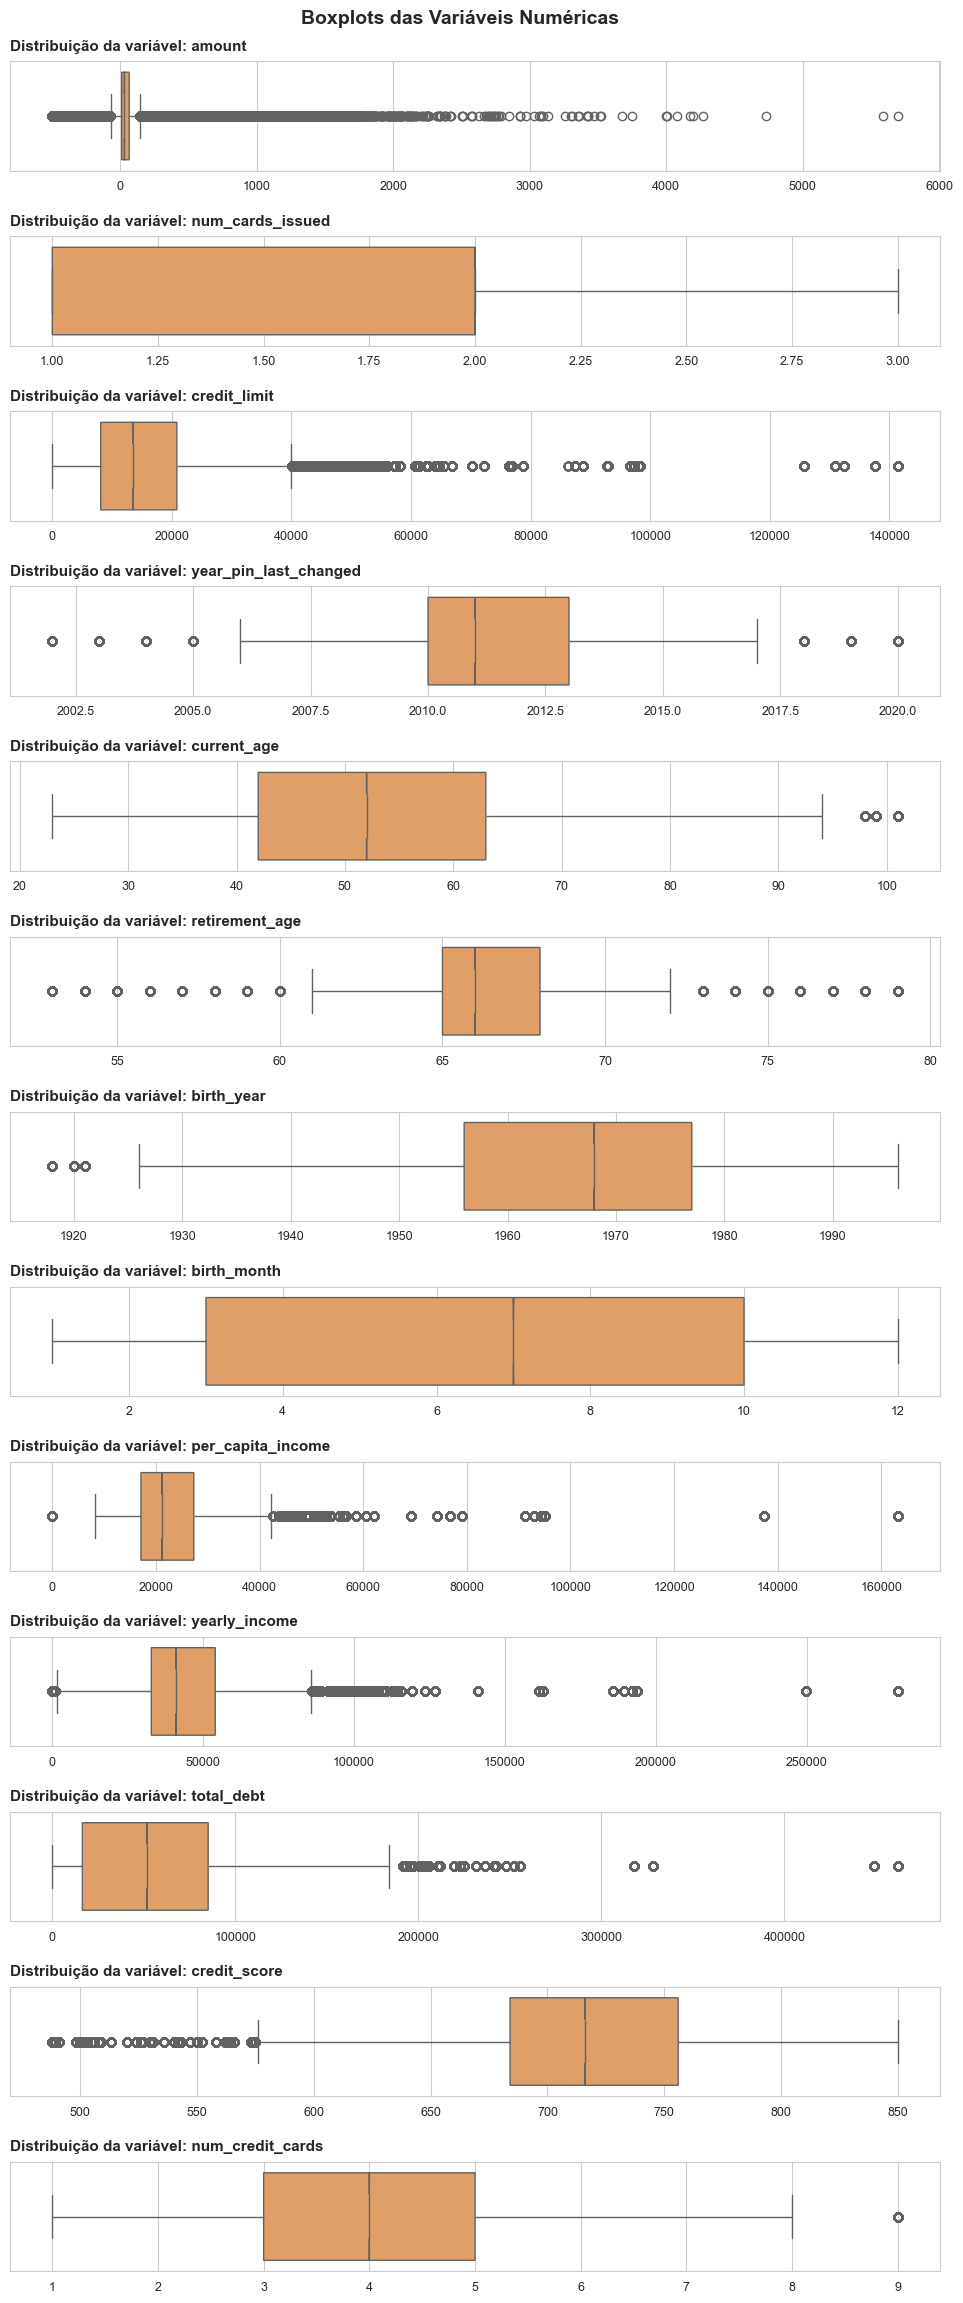

In [26]:
# Seleciona as variáveis numéricas e remove as colunas indesejadas
colunas_numericas = df_train_val.select_dtypes(
    include=['number']).columns.drop(colunas_excluir)

# Número de gráficos a serem exibidos
n_plots = len(colunas_numericas)

# Cria a figura e os subplots dinamicamente
fig, axs = plt.subplots(n_plots, 1, figsize=(12, 2 * n_plots),
                        gridspec_kw={'hspace': 0.6})

# Se houver apenas um gráfico, ajusta axs para ser uma lista
if n_plots == 1:
    axs = [axs]

# Loop para criar cada boxplot
for ax, col in zip(axs, colunas_numericas):
    sns.boxplot(x=df_train_val[col], ax=ax, notch=True, 
                color='#f39e53', orient='h')
    
    # Define título e remove rótulos dos eixos para evitar poluição visual
    ax.set_title(f'Distribuição da variável: {col}', loc='left', fontsize=11,
                 pad=8, fontweight='bold')
    ax.set(xlabel='', ylabel='')
    
    # Ajusta o tamanho dos rótulos
    ax.tick_params(labelsize=9)
    
    # Exibe os números no eixo x sem notação científica
    ax.ticklabel_format(style='plain', axis='x')

# Ajuste manual do espaço superior (local do título)
fig.subplots_adjust(top=0.96)

# Adiciona um título geral
fig.suptitle(
    'Boxplots das Variáveis Numéricas', fontsize=14, fontweight='bold')

# Ajusta o layout para evitar sobreposição
plt.tight_layout()
plt.show()


#### 4.2.3. Análise dos outliers identificados

In [27]:
# Seleciona as variáveis numéricas e remove as colunas indesejadas
colunas_numericas = df_train_val.select_dtypes(
    include=['number']).columns.drop(colunas_excluir)

# Lista para armazenar as informações de outliers por coluna
resultados_outliers = []

for col in colunas_numericas:
    # Calcula quartis e intervalo interquartil (IIQ)
    Q1 = df_train_val[col].quantile(.25)
    Q3 = df_train_val[col].quantile(.75)
    IIQ = Q3 - Q1

    # Define limites inferior e superior para outliers
    limite_inferior = Q1 - 1.5 * IIQ
    limite_superior = Q3 + 1.5 * IIQ

    # Contagem de outliers abaixo e acima dos limites
    outliers_abaixo = (df_train_val[col] < limite_inferior).sum()
    outliers_acima = (df_train_val[col] > limite_superior).sum()
    
    # Calcula a quantidade total de outliers fora dos limites
    total_outliers = outliers_acima + outliers_abaixo
    
    # Calcula a porcentagem total de outliers fora dos limites
    total_outliers_perc = total_outliers / df_train_val.shape[0]
    
    # Armazena resultados em um dicionário
    resultados_outliers.append({
        'Variável': col,
        'IIQ': IIQ,
        'Limite Inferior': limite_inferior,
        'Limite Superior': limite_superior,
        'Outliers Abaixo': outliers_abaixo,
        'Outliers Acima': outliers_acima,
        'Total Outliers': total_outliers,
        '% Outliers': round(total_outliers_perc * 100, 3)
    })
    
# Converte a lista de dicionários em um DataFrame
df_outliers = pd.DataFrame(resultados_outliers) 

# Ordena o DataFrame pela % de outliers em ordem decrescente
df_outliers.sort_values(by='% Outliers', ascending=False, inplace=True)  

# Exibe o DataFrame com os resultados
print('\nResumo dos Outliers por Variável (ordenado por maior %)')
display(df_outliers.reset_index(drop=True))



Resumo dos Outliers por Variável (ordenado por maior %)


,Variável,IIQ,Limite Inferior,Limite Superior,Outliers Abaixo,Outliers Acima,Total Outliers,% Outliers
0,retirement_age,3.00,60.50,72.50,270747,204537,475284,10.662
1,amount,54.76,-73.22,145.82,129803,223515,353318,7.926
2,per_capita_income,10195.00,1820.50,42600.50,24801,244116,268917,6.033
3,yearly_income,21196.00,1023.00,85807.00,14760,235454,250214,5.613
4,year_pin_last_changed,3.00,2005.50,2017.50,64869,143782,208651,4.681
5,credit_limit,12739.00,-11008.50,39947.50,0,153245,153245,3.438
6,credit_score,72.00,576.00,864.00,147559,0,147559,3.310
7,total_debt,68723.00,-86647.50,188244.50,0,97803,97803,2.194
8,current_age,21.00,10.50,94.50,0,30472,30472,0.684
9,birth_year,21.00,1924.50,2008.50,30472,0,30472,0.684


Ao analisar as 13 variáveis numéricas selecionadas para o estudo de outliers, observou-se que 11 delas apresentavam valores atípicos. Partindo da premissa de que os dados são corretos e representam informações verídicas, e não erros de medição ou de entrada, a remoção desses outliers foi descartada. Isso porque tais transações podem, de fato, ocorrer na realidade, inclusive em casos de fraude. Além disso, para a análise de dados e a construção de um modelo preditivo de detecção, a presença desses eventos extremos é fundamental para capturar a variabilidade real dos dados e garantir a robustez do modelo.

#### 4.2.4. Distribuição dos dados em gráfico histograma

In [28]:
# Função para gerar gráficos histogramas para variáveis numéricas do dataframe.

def gerar_graficos_histogramas(dataframe, colunas_excluir=None, bins=25, kde=True):
    '''
    Função para gerar histogramas para todas as variáveis numéricas do DataFrame.

    :param dataframe: DataFrame
        DataFrame contendo os dados.
    :param colunas_excluir: list, opcional
        Lista de colunas a serem excluídas da análise (padrão: None).
    :param bins : int, opcional
        Número de bins (intervalos) do histograma (padrão: 25).
    :param kde : bool, opcional
        Se True, inclui a curva de densidade (padrão: True).
    '''
    # Seleciona as variáveis numéricas e remove as colunas indesejadas
    colunas_numericas = dataframe.select_dtypes(
        include=['number']).columns.drop(colunas_excluir)

    # Calcula a quantidade de subplots necessários
    qtde_subplots = len(colunas_numericas)

    # Configuração para múltiplos gráficos: 2 colunas por linha
    colunas_subplot = 2
    qtde_linhas = -(-qtde_subplots // colunas_subplot)

    # Criação da figura com subplots
    fig, axs = plt.subplots(qtde_linhas, colunas_subplot, figsize=(15, 4 * qtde_linhas))

    # Transformação do array de subplots para facilitar o loop
    axs = axs.flatten()

    # Remove subplots vazios, caso existam
    for i in range(qtde_subplots, len(axs)):
        fig.delaxes(axs[i])

    # Loop sobre as variáveis numéricas para criar os histogramas
    for i, coluna in enumerate(colunas_numericas):
        sns.histplot(data=dataframe, x=coluna, ax=axs[i], bins=bins, kde=kde, 
                     color='#61b3ef')

        # Configura o título e remove os rótulos dos eixos
        axs[i].set_title(f'Distribuição da variável: {coluna}', fontsize=12, 
                         loc='left', fontweight='bold')
        axs[i].set(xlabel='', ylabel='')

        # Ajusta o tamanho dos rótulos
        axs[i].tick_params(labelsize=9)

        # Exibe rótulos sem notação científica
        axs[i].ticklabel_format(style='plain', axis='y')

    # Adiciona um título geral
    fig.suptitle('Histogramas das Variáveis Numéricas', fontsize=14, fontweight='bold')

    # Ajusta o layout para evitar sobreposição
    plt.tight_layout()
    plt.subplots_adjust(hspace=0.3, top=0.95) # Mais espaço entre os gráficos
    plt.show()


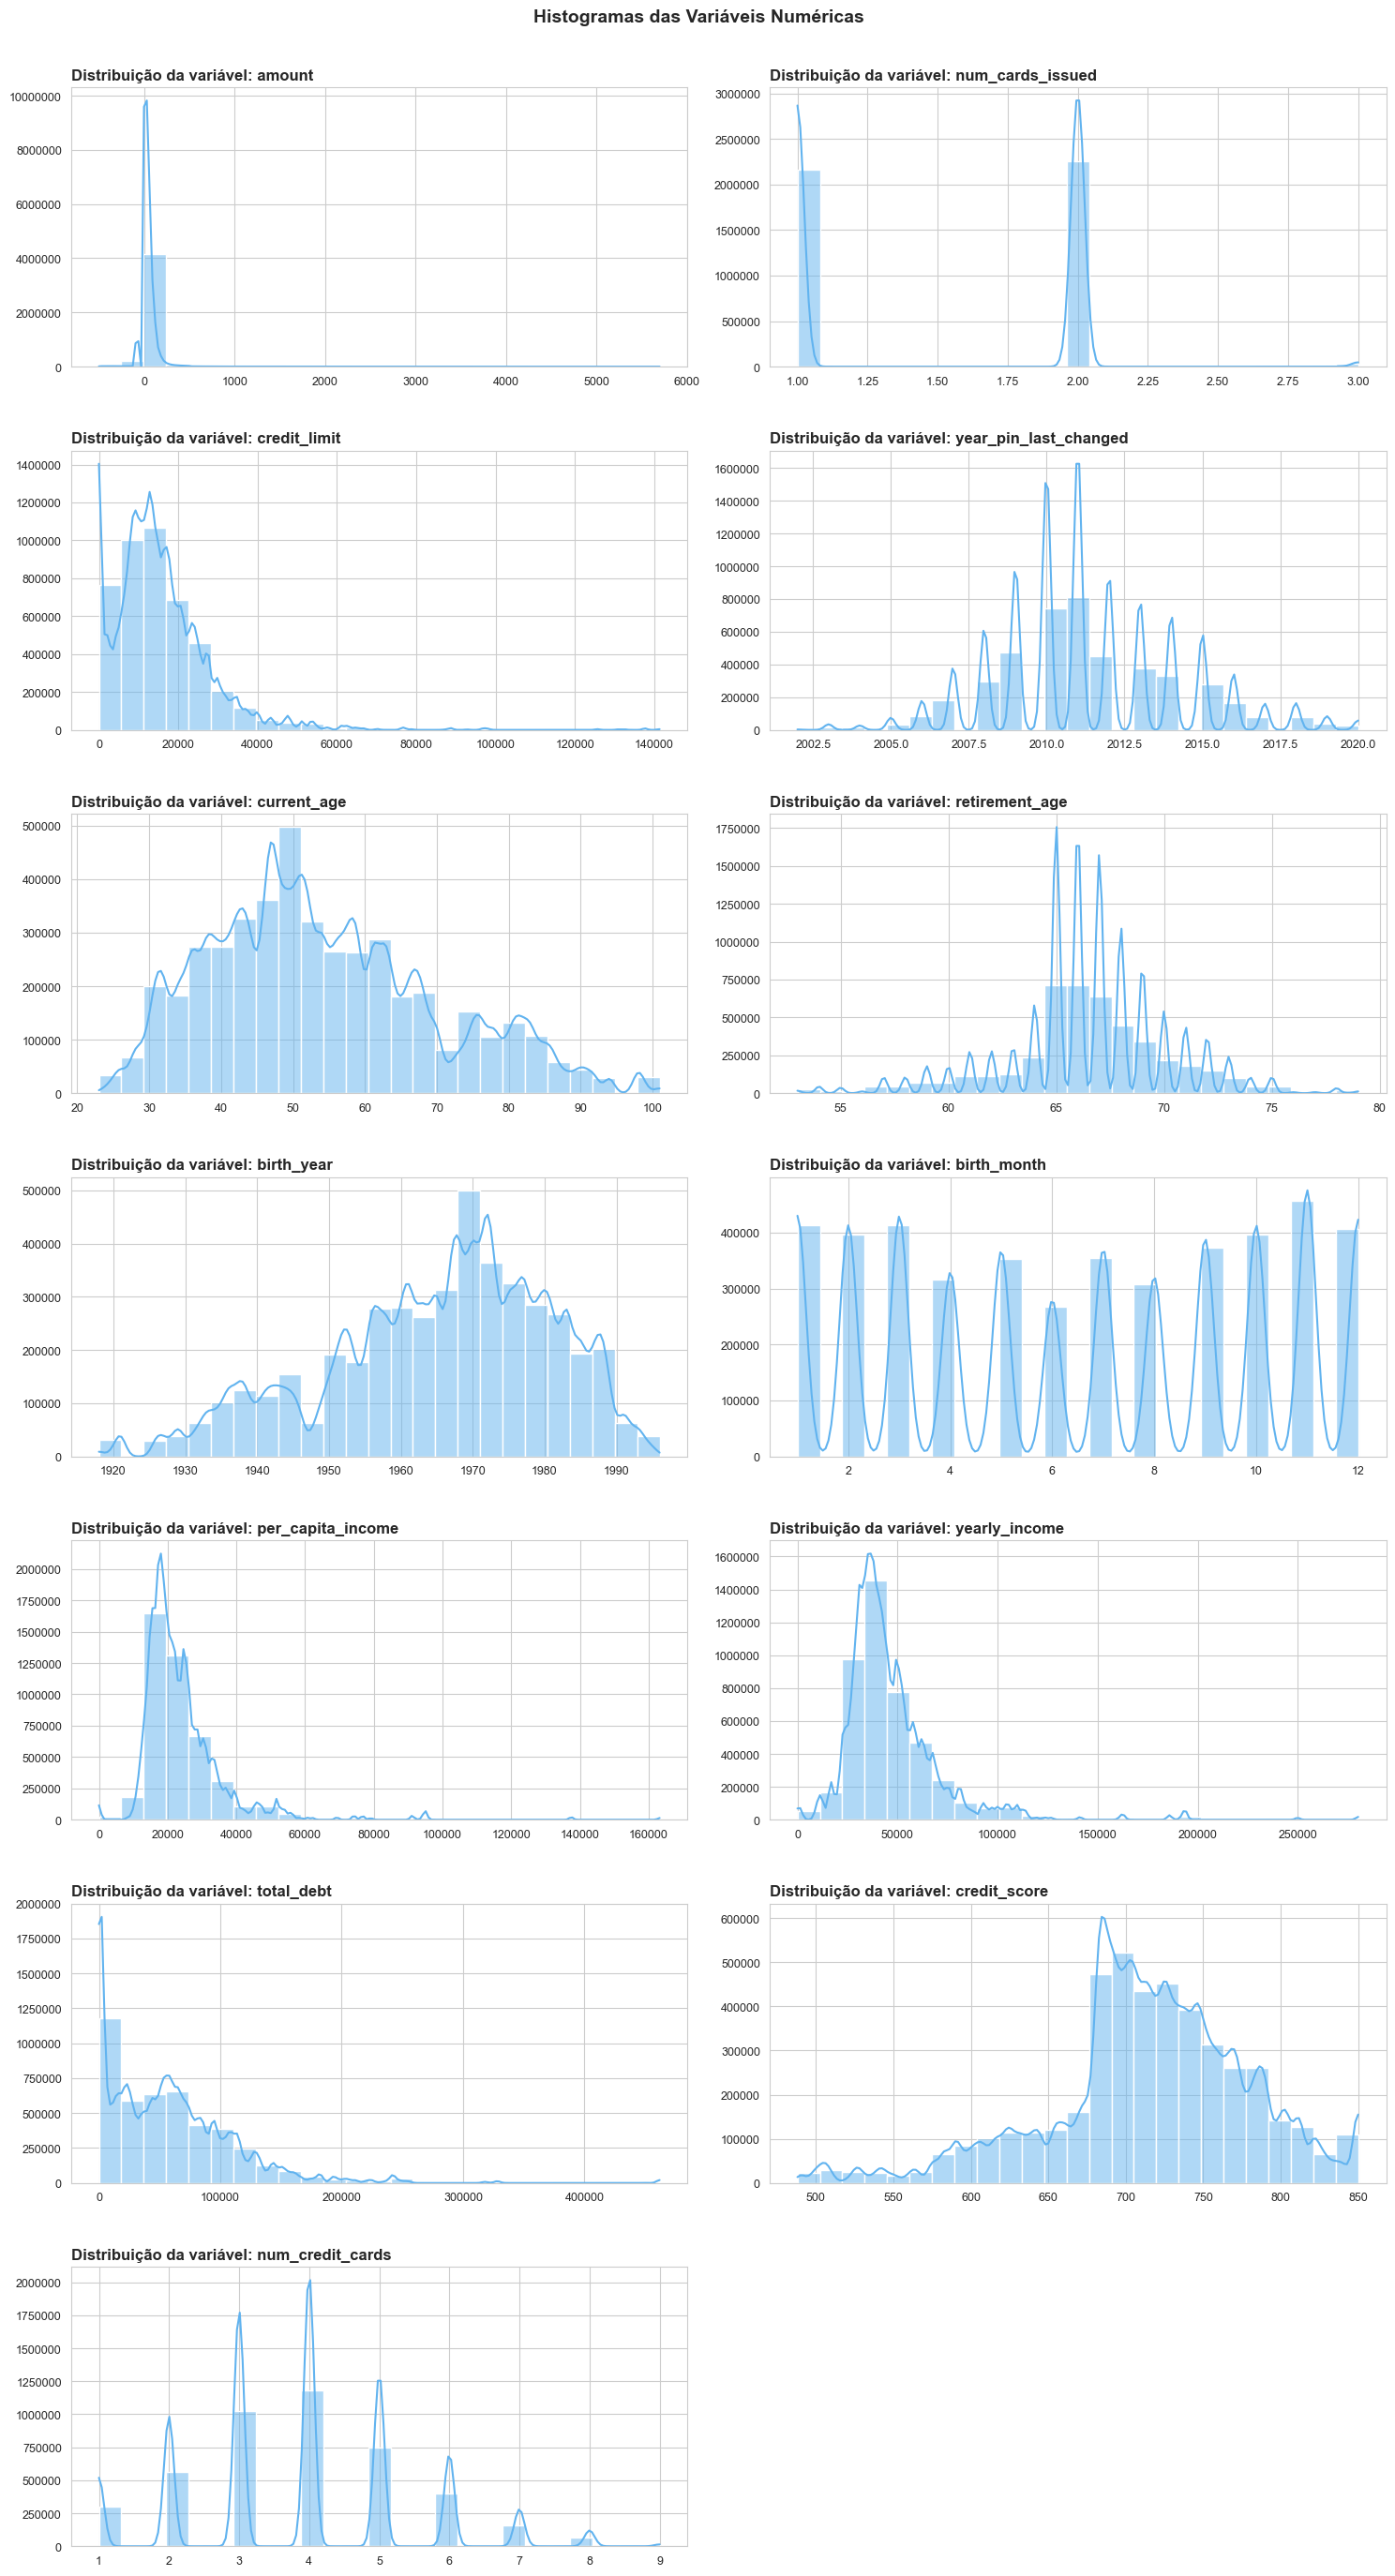

In [29]:
# Chamada da função para geração dos histogramas

gerar_graficos_histogramas(df_train_val, colunas_excluir)

**Insights extraídos**

- **amount (valor):** Forte concentração de valores abaixo de US<em>&#36;</em> 500 e próximos a zero, com presença de valores negativos (possivelmente estornos, taxas ou ajustes).
- **num_cards_issued (número de cartões emitidos):** A maioria dos clientes possui entre 1 e 2 cartões emitidos, possivelmente refletindo a emissão inicial ao abrir a conta ou a emissão gradual ao longo do tempo.  
- **credit_limit (limite de crédito):** O limite de crédito mais frequente situa-se entre US<em>&#36;</em> 1.000 e US<em>&#36;</em> 1.500, mas há uma minoria com limites substancialmente maiores. A presença de limites zerados pode indicar bloqueios ou regras de negócio específicas.
- **year_pin_last_changed (ano da última alteração do PIN):** Entre 2010 e 2012, houve o maior número de alterações de PIN, o que pode sinalizar maior conscientização de segurança, adoção de novas tecnologias ou mudanças nas políticas internas de segurança.  
- **current_age (idade do cliente):** Aproximadamente 50 anos é a faixa etária predominante entre os clientes, sem incidência de idades negativas.  
- **retirement_age (idade esperada para aposentadoria):** 65 e 66 anos são as idades mais comuns para aposentadoria.  
- **birth_year (ano de nascimento):** 1970 é o ano de nascimento mais frequente entre os clientes.  
- **birth_month (mês de nascimento):** Novembro concentra o maior número de nascimentos.
- **per_capita_income (renda per capita):** A maior parte dos clientes possui renda per capita entre US<em>&#36;</em> 15.000 e US<em>&#36;</em> 20.000.
- **yearly_income (renda anual):** US<em>&#36;</em> 40.000 é a renda anual de maior predominância entre os clientes.  
- **total_debt (dívida total):** A dívida total dos clientes concentra-se em torno de US<em>&#36;</em> 1.000, mas há um segundo pico em aproximadamente de US<em>&#36;</em> 5.000, indicando clientes com dívidas significativamente mais altas.
- **credit_score (score de crédito):** A maioria dos clientes encontram-se nas faixas superiores a 700 pontos, o que é considerado um perfil razoavelmente bom, ainda assim, há uma parcela relevante de clientes com pontuações mais baixas. 
- **num_credit_cards (número de cartões de crédito ativos):** 4 cartões ativos é a quantidade mais frequente entre os clientes, sugerindo que muitos possuam cartões adicionais de outras instituições.

#### 4.2.5. Distribuição dos dados em gráfico de barras (countplot)

In [30]:
# Lista de colunas que serão excluídas da análise
colunas_excluir = [
    'merchant_city', 'merchant_state', 'expires', 'acct_open_date', 'address', 'description'
]

In [31]:
# Função para gerar gráficos de barras (countplots) para todas as variáveis categóricas do dataframe.

def gerar_countplots(dataframe, colunas_excluir=None, limite_categorias=20):
    '''
    Função para gerar gráficos de barras (countplots) para todas as 
    variáveis categóricas do DataFrame.

    :param dataframe: DataFrame
        DataFrame contendo os dados.
    :param colunas_excluir: list, opcional
        Lista de colunas a serem excluídas da análise (padrão: None).
    :param limite_categorias : int, opcional
        Número máximo de categorias exibidas em cada gráfico (padrão: 20).
    '''
    # Seleciona as variáveis categóricas e remove as indesejadas
    colunas_categoricas = dataframe.select_dtypes(
        include=['object', 'category']).columns.drop(colunas_excluir)

    # Calcula a quantidade de subplots necessários
    qtde_subplots = len(colunas_categoricas)

    # Configuração para múltiplos gráficos: 2 colunas por linha
    colunas_subplot = 2
    qtde_linhas = -(-qtde_subplots // colunas_subplot)

    # Criação da figura com subplots
    fig, axs = plt.subplots(qtde_linhas, colunas_subplot, figsize=(15, 4 * qtde_linhas))

    # Transformação do array de subplots para facilitar o loop
    axs = axs.flatten()

    # Remove subplots vazios, caso existam
    for i in range(qtde_subplots, len(axs)):
        fig.delaxes(axs[i])

    # Loop sobre as variáveis categóricas para criar os countplots
    for i, coluna in enumerate(colunas_categoricas):
        # Conta os valores da variável e ordena do maior para o menor
        dados_coluna = dataframe[coluna].value_counts().iloc[:limite_categorias]

        sns.barplot(x=dados_coluna.values, y=dados_coluna.index, ax=axs[i],
            color='#61b3ef')

        # Configura o título e remove os rótulos dos eixos
        axs[i].set_title(f'Distribuição da variável: {coluna}', fontsize=12, 
                         loc='left', fontweight='bold')
        axs[i].set(xlabel='', ylabel='')

        # Ajusta o tamanho dos rótulos
        axs[i].tick_params(labelsize=9)

        # Adiciona os valores no final das barras
        for p in axs[i].patches:
            axs[i].annotate(
                f'{int(p.get_width()):,}'.replace(',', '.'),  # Formatação com separador de milhar
                (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center',
                fontsize=9, fontweight='bold',
                color='black',
                xytext=(5, 0),
                textcoords='offset points'
            )
        
        # Exibe rótulos sem notação científica
        axs[i].ticklabel_format(style='plain', axis='x')
            
    # Adiciona um título geral
    fig.suptitle('Gráficos de Barras das Variáveis Categóricas', fontsize=14, fontweight='bold')            

    # Ajuste do layout para evitar sobreposição
    plt.tight_layout()
    plt.subplots_adjust(hspace=0.3, top=0.94) # Mais espaço entre os gráficos
    plt.show()


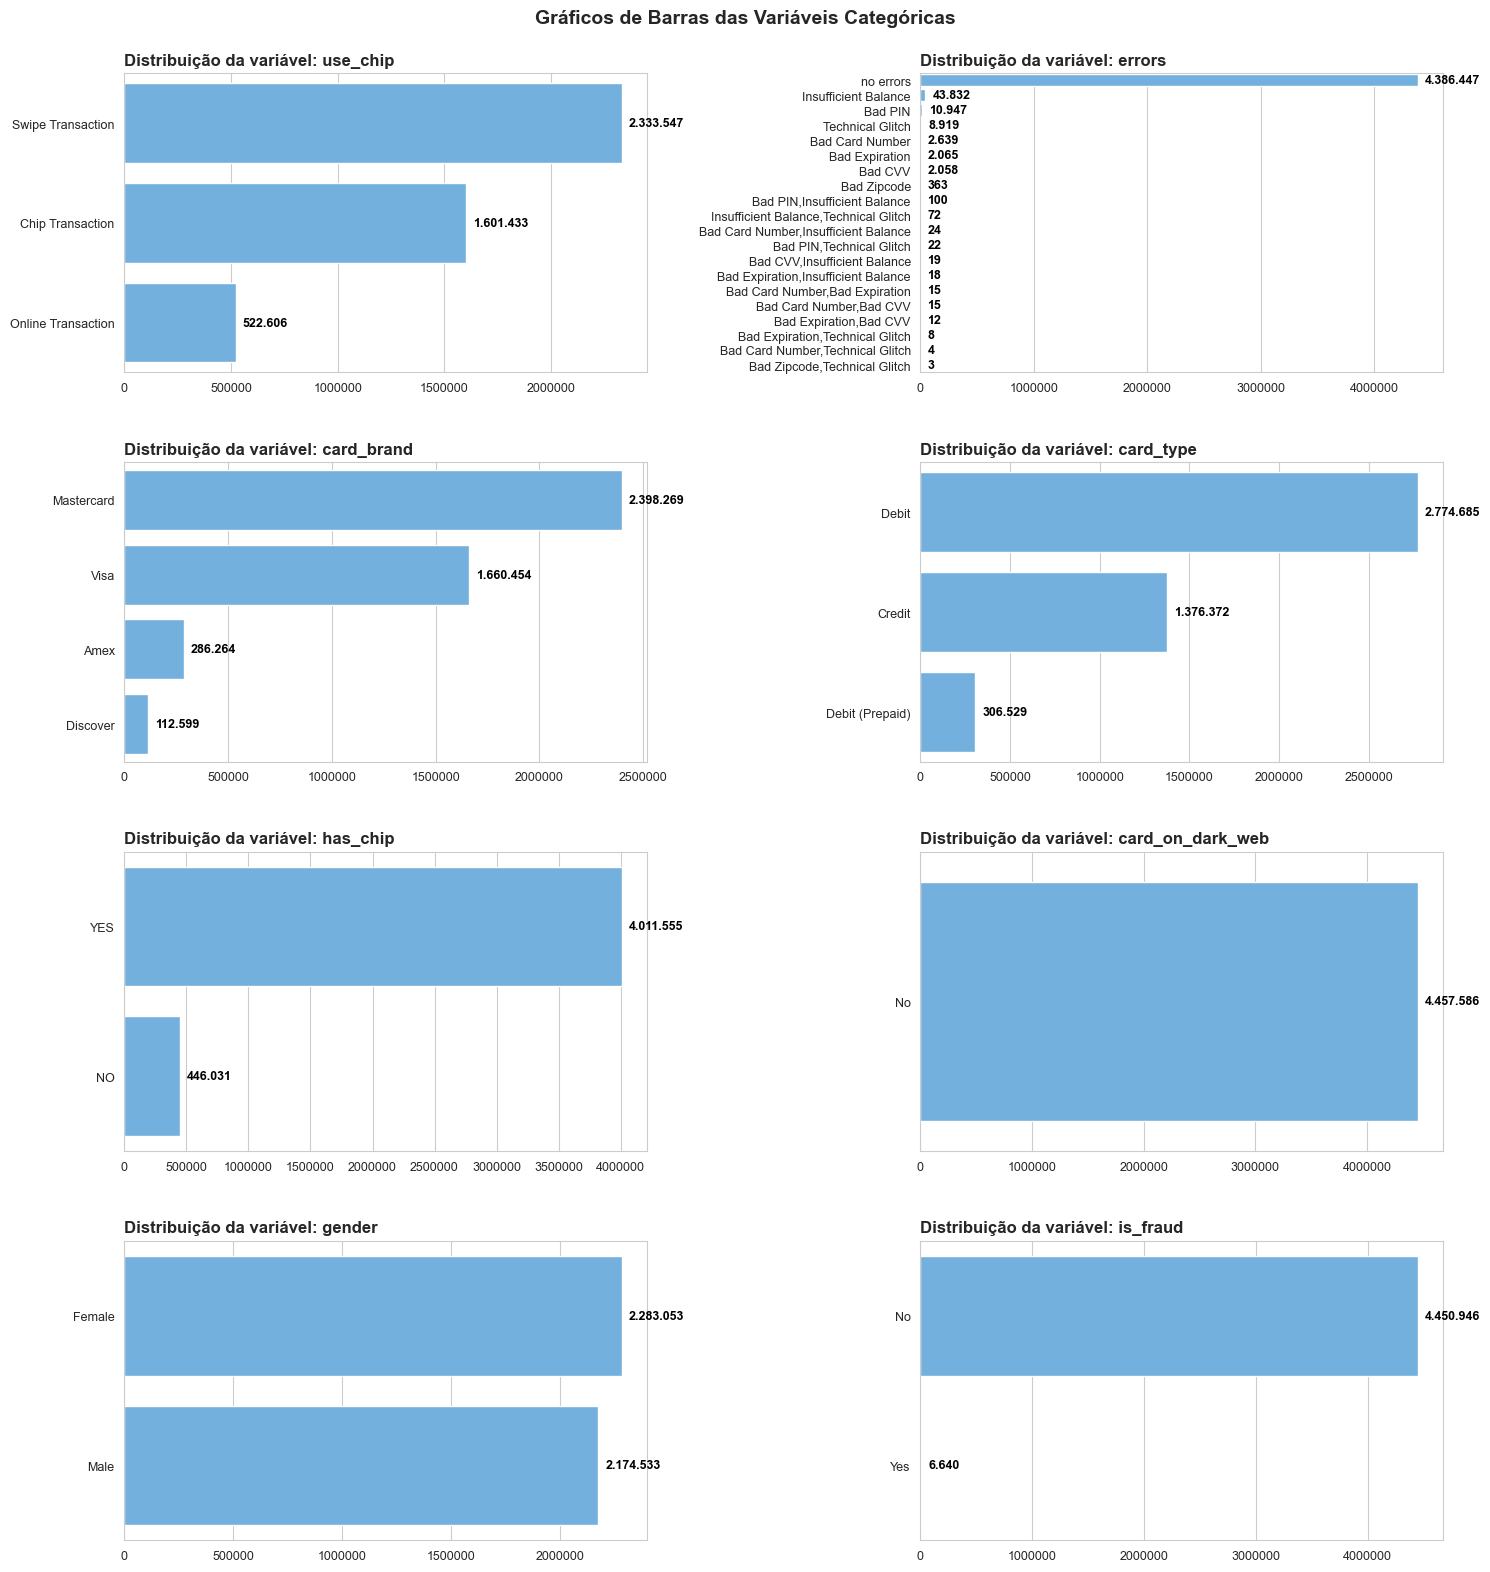

In [32]:
# Chamada da função para geração dos countplots

gerar_countplots(df_train_val, colunas_excluir)

**Insights extraídos**

- **use_chip (tipo de transação):** Transações realizadas com cartão com chip ou via tarja magnética somam mais de 3 milhões, enquanto as transações online ultrapassam 500 mil. Esse volume sugere ampla adoção de cartões com chip, mas ainda há uso considerável de tarja magnética e canais online.
- **errors (erros nas transação):** Aproximadamente 73 mil transações apresentaram algum tipo de erro, em contrapartida, mais de 4 milhões de transações foram concluídas com sucesso. Entre os erros mais comuns, destacam-se _"Insufficient Balance"_ e _"Wrong PIN"_, o que pode indicar oportunidades de melhoria em segurança e controle de saldo.
- **card_brand (bandeira do cartão):** As bandeiras Mastercard e Visa, somadas, representam mais de 4 milhões de transações, isso evidencia a dominância dessas bandeiras no mercado. As demais bandeiras totalizam menos de 400 mil transações.
- **card_type (tipo de cartão):** Cartões de débito são os mais usados, com mais de 2,7 milhões de transações, em seguida, aparecem os cartões de crédito (1,3 milhão) e, por fim, os pré-pagos (mais de 300 mil). O alto uso de débito pode indicar um perfil de clientes que prefere pagamentos imediatos.
- **has_chip (indica se o cartão possui chip):** Mais de 4 milhões de transações envolvem cartões com chip e menos de 446 mil transações foram feitas com cartões sem chip. A adoção de chip é ampla, mas ainda existe um volume considerável de cartões sem chip.
- **card_on_dark_web (indica se o cartão consta na dark web):** Nenhum cartão foi encontrado na dark web neste conjunto de dados, porém, manter políticas de monitoramento e prevenção é essencial para garantir segurança contínua.
- **gender (gênero do cliente):** Há cerca de 2,2 milhões de clientes do gênero feminino e o gênero masculino corresponde a aproximadamente 2,1 milhões de clientes, o que demonstra que há uma distribuição relativamente equilibrada.
- **is_fraud (indica se a transação foi fraudulenta):** Apenas cerca de 6 mil transações são identificadas como fraudulentas, em contrapartida, mais de 4,4 milhões de transações são legítimas. Apesar do baixo volume de fraudes, é fundamental analisar se existem padrões que possam orientar estratégias de prevenção e detecção.

## 5. Análise exploratória dos dados

### 5.1. Distribuição das transações segmentadas por legítimas e fraudulentas

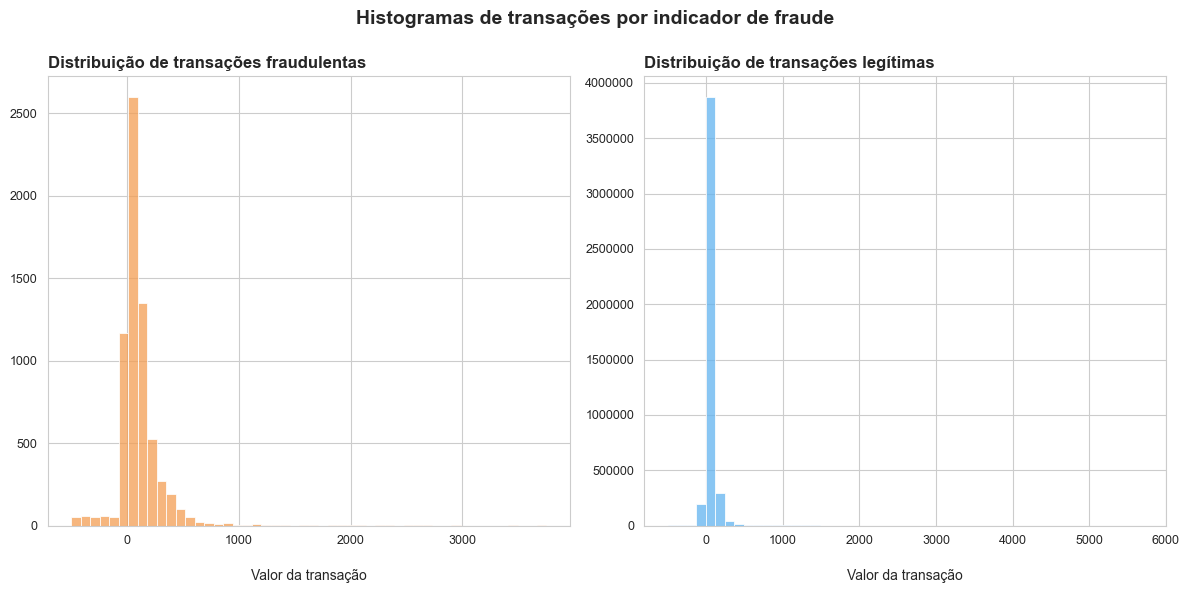

In [33]:
# Filtrando os dados considerando apenas as transações fraudulentas e não fraudulentas
df_fraud_yes = df_train_val[df_train_val['is_fraud'] == 'Yes']
df_fraud_no = df_train_val[df_train_val['is_fraud'] == 'No']

# Dicionário para armazenar os dataframes filtrados
dict_dfs = {
    'fraudulentas': df_fraud_yes, 
    'legítimas': df_fraud_no
}

# Criação da figura com subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Loop sobre os dataframes para criar os histogramas
for i, (title, df) in enumerate(dict_dfs.items()):
        # Escolhendo cores distintas para cada classe
    color = '#f39e53' if title == 'fraudulentas' else '#61b3ef'
    
    # Gerando o histograma sem KDE
    sns.histplot(data=df, x='amount', ax=axs[i], bins=50, kde=False, color=color)
    
    # Configura o título e os rótulos dos eixos
    axs[i].set_title(f'Distribuição de transações {title}', 
                     fontsize=12, loc='left', fontweight='bold')
    axs[i].set(xlabel='\nValor da transação', ylabel='')
    
    # Ajusta o tamanho dos rótulos
    axs[i].tick_params(labelsize=9)
    
    # Exibe rótulos sem notação científica
    axs[i].ticklabel_format(style='plain', axis='y')

# Adiciona um título geral
fig.suptitle('Histogramas de transações por indicador de fraude', fontsize=14, fontweight='bold')

# Ajusta o layout para evitar sobreposição
plt.tight_layout()
plt.subplots_adjust(hspace=0.3, top=0.87) # Mais espaço entre os gráficos
plt.show()

In [34]:
# Calculando a descrição estatística para as transações legítimas e fraudulentas
desc_fraud_yes = df_fraud_yes[['amount']].describe().T
desc_fraud_no = df_fraud_no[['amount']].describe().T

# Concatenando as duas descrições com o índice definido como 'fraud'
df_describe = pd.concat([desc_fraud_yes, desc_fraud_no], 
                        keys=['Legítimas', 'Fraudulentas'])
df_describe = df_describe.reset_index()

# Remover a coluna 'level_1'
df_describe = df_describe.drop(columns=['level_1'])

# Renomear a coluna 'level_0' para 'transações'
df_describe = df_describe.rename(columns={'level_0': 'transações'})

# Calcular o total de transações
total_transacoes = df_describe['count'].sum()

# Criar uma nova coluna com o percentual
df_describe.insert(loc=2, column='% count', value=(df_describe['count'] / total_transacoes) * 100)

# Exibindo o resultado
df_describe

,transações,count,% count,mean,std,min,25%,50%,75%,max
0,Legítimas,6640.0,0.14896,110.780038,213.088580,-497.0,17.9875,70.655,150.8925,3750.60
1,Fraudulentas,4450946.0,99.85104,42.876152,81.288446,-500.0,8.9200,28.940,63.5700,5696.78


**Insights extraídos**

**Distribuição concentrada em valores baixos**  
   - Tanto para transações fraudulentas quanto legítimas, a maioria das operações ocorre em valores baixos.
   - O valor médio das transações legítimas (**110,78**) é mais do que o dobro das fraudulentas (**42,88**).
   - A mediana das transações fraudulentas (**28,94**) é muito menor do que a das legítimas (**70,66**).
   - Isso pode indicar que fraudes são mais comuns em transações de pequeno valor, possivelmente para evitar detecção.

**Assimetria na distribuição**  
   - Ambas as distribuições apresentam uma cauda longa à direita, sugerindo que, embora a maioria das transações tenha valores pequenos, existem algumas transações de valores altos.

**Maior volume de transações legítimas**  
   - As transações legítimas tem uma frequência muito superior as fraudes.
   - Apenas **0,15%** das transações são legítimas, enquanto **99,85%** são fraudulentas.

**Padrão de fraudes diferente de legítimas**  
   - As transações fraudulentas parecem estar um pouco mais espalhadas do que as legítimas, indicando que fraudes podem ocorrer em uma faixa de valores um pouco mais variada.

**Valores negativos nas transações**  
   - Ambas as classes possuem valores mínimos negativos (**-500 para fraudulentas e -497 para legítimas**).
   - Isso pode indicar transações de saída como estornos/reembolsos.

### 5.2. Distribuição das transações por comportamento temporal e taxa de fraude

In [35]:
# Convertendo a coluna 'date' para datetime
df_train_val['date'] = pd.to_datetime(df_train_val['date'])

#### 5.2.1. Distribuição das transações por ano e a taxa de fraude

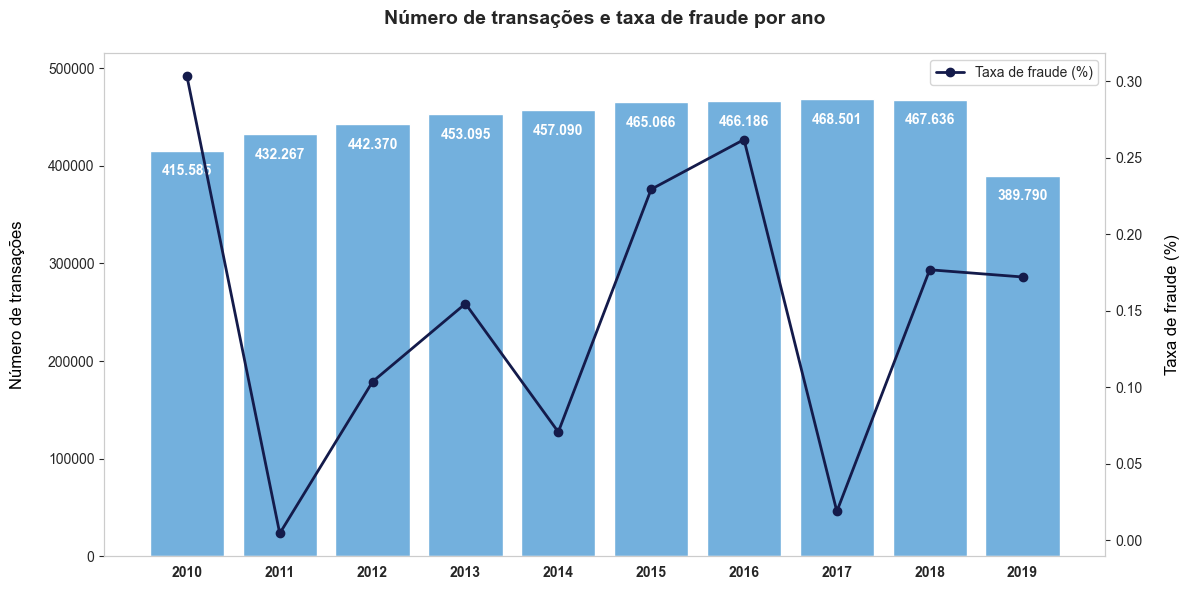

In [36]:
# Calculando a taxa de fraude por ano
df_plot_01 = df_train_val.groupby(df_train_val['date'].dt.year).agg(
    total_transactions=('is_fraud', 'count'),
    fraudulent_transactions=('is_fraud', lambda x: (x == 'Yes').sum())
).reset_index()

# Renomeando a coluna para 'year'
df_plot_01.rename(columns={'date': 'year'}, inplace=True)
df_plot_01['year_name'] = df_plot_01['year'].apply(
    lambda x: pd.to_datetime(str(x), format='%Y').strftime('%Y'))

# Adicionando a coluna com a taxa de fraude (em porcentagem)
df_plot_01['fraud_rate'] = df_plot_01['fraudulent_transactions'] / df_plot_01['total_transactions']

# Ordenando os anos para garantir a ordem correta
df_plot = df_plot_01.set_index('year').sort_index().reset_index()

# Criando o gráfico de barras para transações por ano
plt.figure(figsize=(12, 6))
ax1 = sns.barplot(x=df_plot['year_name'], y=df_plot['total_transactions'], palette=['#61b3ef'])

# Adicionando os valores nas barras
for p in ax1.patches:
    ax1.annotate(
        f'{int(p.get_height()):,}'.replace(',', '.'),  # Formatação com separador de milhar
        (p.get_x() + p.get_width() / 2, p.get_height()),  # Colocando o valor no topo da barra
        ha='center', va='bottom',  # Alinhamento
        fontsize=10, fontweight='bold',
        color='white',
        xytext=(0, -20),  # Distância do texto para a barra
        textcoords='offset points'
    )

# Remover as linhas de grade
ax1.grid(False)

# Ajustando o limite do eixo y
ax1.set_ylim(0, df_plot_01['total_transactions'].max() * 1.1)

# Ajustando o eixo x aplicando negrito
ax1.set_xticklabels(ax1.get_xticklabels(), fontweight='bold')
    
# Criando o segundo eixo y para a taxa de fraude
ax2 = ax1.twinx()
ax2.plot(df_plot_01['year_name'], df_plot_01['fraud_rate'] * 100, marker='o', linestyle='-', 
         color='#141b4b', linewidth=2, markersize=6, label='Taxa de fraude (%)')

# Adiciona a legenda para o segundo eixo y
ax2.legend(loc='best')

# Adicionando título e rótulos
plt.title('Número de transações e taxa de fraude por ano\n', fontsize=14, fontweight='bold')
ax1.set_ylabel('Número de transações\n', color='black', fontsize=12)
ax1.set_xlabel('', color='black', fontsize=12)
ax2.set_ylabel('\nTaxa de fraude (%)', color='black', fontsize=12)

# Exibindo o gráfico
plt.tight_layout()
plt.grid(False)
plt.show()

**Insights extraídos**

**Número total de transações é relativamente estável**  
   - Entre 2010 e 2018, o volume de transações se manteve em torno de **400.000 a 468.000 por ano**.
   - Em 2019, houve uma **queda significativa**, com o número de transações reduzindo para cerca de **389.790**.

**Variação na taxa de fraude ao longo dos anos**  
   - A taxa de fraude era muito alta em **2010**, mas despencou drasticamente em **2011**.
   - Entre **2012 e 2016**, houve uma tendência de **aumento na taxa de fraude**, atingindo um pico em **2016**.
   - Em **2017**, a taxa caiu drasticamente novamente, sugerindo possíveis medidas de prevenção implementadas.
   - Em **2018 e 2019**, a taxa voltou a subir, mas não alcançou os picos anteriores.

**Possíveis explicações**  
   - A queda brusca da taxa de fraude em 2011 e 2017 pode indicar **mudanças em sistemas antifraude**, novas regras de segurança ou alterações no comportamento dos fraudadores.
   - O aumento progressivo entre 2012 e 2016 pode sugerir que **os fraudadores se adaptaram** e encontraram novas formas de burlar os sistemas.

#### 5.2.2. Distribuição das transações por mês e a taxa de fraude

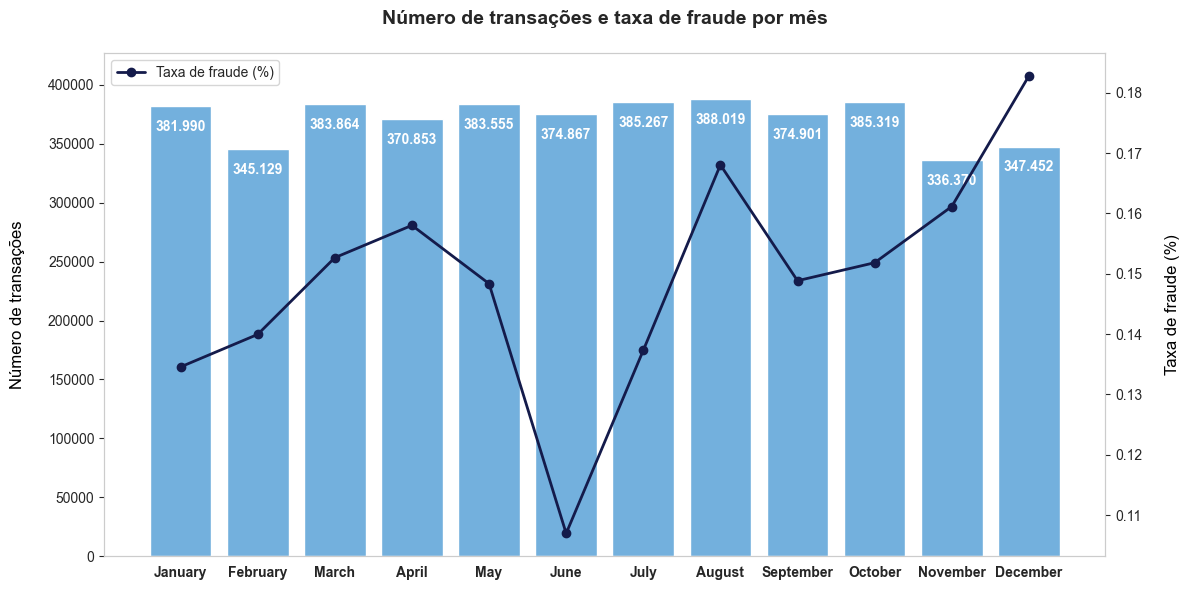

In [37]:
# Calculando a taxa de fraude por mês
df_plot_02 = df_train_val.groupby(df_train_val['date'].dt.month).agg(
    total_transactions=('is_fraud', 'count'),
    fraudulent_transactions=('is_fraud', lambda x: (x == 'Yes').sum())
).reset_index()

# Renomeando a coluna para 'month'
df_plot_02.rename(columns={'date': 'month'}, inplace=True)
df_plot_02['month_name'] = df_plot_02['month'].apply(
    lambda x: pd.to_datetime(str(x), format='%m').month_name())

# Adicionando a coluna com a taxa de fraude (em porcentagem)
df_plot_02['fraud_rate'] = df_plot_02['fraudulent_transactions'] / df_plot_02['total_transactions']

# Ordenando os anos para garantir a ordem correta
df_plot_02 = df_plot_02.set_index('month').sort_index().reset_index()

# Criando o gráfico de barras para transações por mês
plt.figure(figsize=(12, 6))
ax1 = sns.barplot(x=df_plot_02['month_name'], y=df_plot_02['total_transactions'], palette=['#61b3ef'])

# Adicionando os valores nas barras
for p in ax1.patches:
    ax1.annotate(
        f'{int(p.get_height()):,}'.replace(',', '.'),  # Formatação com separador de milhar
        (p.get_x() + p.get_width() / 2, p.get_height()),  # Colocando o valor no topo da barra
        ha='center', va='bottom',  # Alinhamento
        fontsize=10, fontweight='bold',
        color='white',
        xytext=(0, -20),  # Distância do texto para a barra
        textcoords='offset points'
    )
    
# Remover as linhas de grade
ax1.grid(False)

# Ajustando o limite do eixo y
ax1.set_ylim(0, df_plot_02['total_transactions'].max() * 1.1)

# Ajustando o eixo x aplicando negrito
ax1.set_xticklabels(ax1.get_xticklabels(), fontweight='bold')

# Criando o segundo eixo y para a taxa de fraude
ax2 = ax1.twinx()
ax2.plot(df_plot_02['month_name'], df_plot_02['fraud_rate'] * 100, marker='o', linestyle='-', 
         color='#141b4b', linewidth=2, markersize=6, label='Taxa de fraude (%)')

# Adiciona a legenda para o segundo eixo y
ax2.legend(loc='best')

# Adicionando título e rótulos
plt.title('Número de transações e taxa de fraude por mês\n', fontsize=14, fontweight='bold')
ax1.set_ylabel('Número de transações\n', color='black', fontsize=12)
ax1.set_xlabel('', color='black', fontsize=12)
ax2.set_ylabel('\nTaxa de fraude (%)', color='black', fontsize=12)

# Exibindo o gráfico
plt.tight_layout()
plt.grid(False)
plt.show()

**Insights extraídos**

**Volume de transações mensal**  
- As transações mensais variam entre aproximadamente **336 mil** e **388 mil** operações.  
- Meses como novembro apresentam os volumes mais baixos, enquanto agosto atinge o pico.

**Taxa de fraude**  
- A taxa de fraude mensal oscila entre **0,11%** e **0,18%**.  
- Picos notáveis em **agosto** e **dezembro** sugerem que esses períodos podem ter dinâmicas específicas que impactam a incidência de fraudes.

**Relação volume x fraude**  
- Em agosto, o volume é acompanhado por um aumento na taxa de fraude, o que pode indicar vulnerabilidades exploradas.  
- Dezembro apresenta um pico na taxa de fraude mesmo sem ser o mês de maior volume, reforçando que fatores sazonais (como promoções de fim de ano) podem facilitar ações fraudulentas.

#### 5.2.3. Distribuição das transações por dia da semana e a taxa de fraude

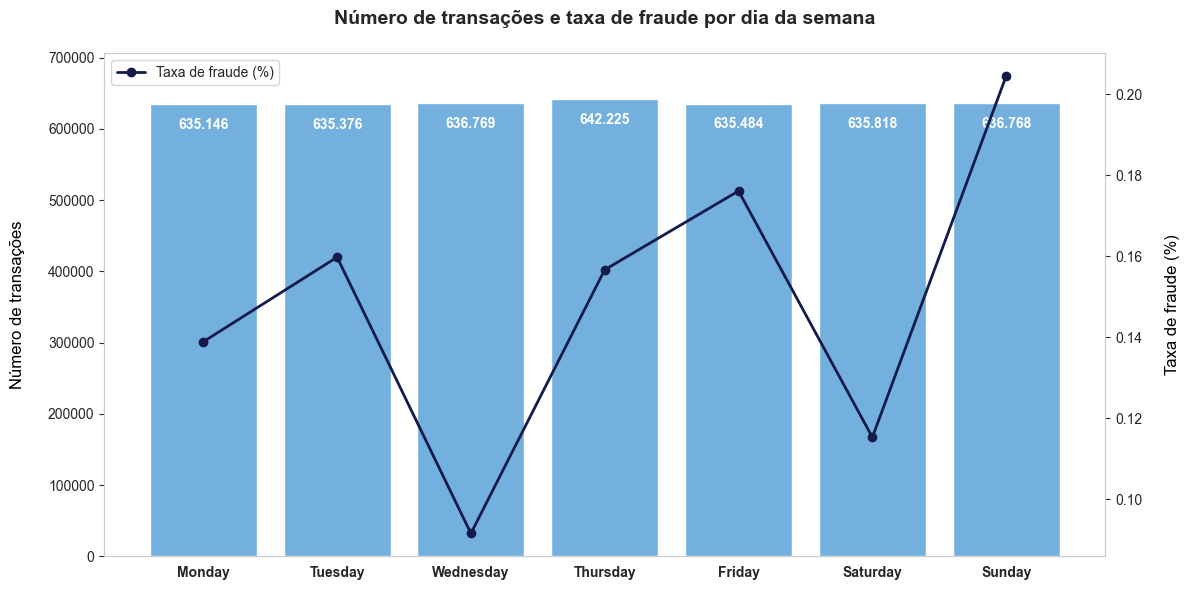

In [38]:
# Calculando a taxa de fraude por dia da semana
df_plot_03 = df_train_val.groupby(df_train_val['date'].dt.day_name()).agg(
    total_transactions=('is_fraud', 'count'),
    fraudulent_transactions=('is_fraud', lambda x: (x == 'Yes').sum())
).reset_index()

# Renomeando a coluna para 'day_name'
df_plot_03.rename(columns={'date': 'day_name'}, inplace=True)

# Adicionando a coluna com a taxa de fraude (em porcentagem)
df_plot_03['fraud_rate'] = df_plot_03['fraudulent_transactions'] / df_plot_03['total_transactions']

# Ordenando os anos para garantir a ordem correta
df_plot_03 = df_plot_03.set_index('day_name').reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).reset_index()

# Criando o gráfico de barras para transações por dia da semana
plt.figure(figsize=(12, 6))
ax1 = sns.barplot(x=df_plot_03['day_name'], y=df_plot_03['total_transactions'], palette=['#61b3ef'])

# Adicionando os valores nas barras
for p in ax1.patches:
    ax1.annotate(
        f'{int(p.get_height()):,}'.replace(',', '.'),  # Formatação com separador de milhar
        (p.get_x() + p.get_width() / 2, p.get_height()),  # Colocando o valor no topo da barra
        ha='center', va='bottom',  # Alinhamento
        fontsize=10, fontweight='bold',
        color='white',
        xytext=(0, -20),  # Distância do texto para a barra
        textcoords='offset points'
    )
    
# Remover as linhas de grade
ax1.grid(False)

# Ajustando o limite do eixo y
ax1.set_ylim(0, df_plot_03['total_transactions'].max() * 1.1)  

# Ajustando o eixo x aplicando negrito
ax1.set_xticklabels(ax1.get_xticklabels(), fontweight='bold')

# Criando o segundo eixo y para a taxa de fraude
ax2 = ax1.twinx()
ax2.plot(df_plot_03['day_name'], df_plot_03['fraud_rate'] * 100, marker='o', linestyle='-', 
         color='#141b4b', linewidth=2, markersize=6, label='Taxa de fraude (%)')

# Adiciona a legenda para o segundo eixo y
ax2.legend(loc='best')

# Adicionando título e rótulos
plt.title('Número de transações e taxa de fraude por dia da semana\n', fontsize=14, fontweight='bold')
ax1.set_ylabel('Número de transações\n', color='black', fontsize=12)
ax1.set_xlabel('', color='black', fontsize=12)
ax2.set_ylabel('\nTaxa de fraude (%)', color='black', fontsize=12)

# Exibindo o gráfico
plt.tight_layout()
plt.grid(False)
plt.show()

**Insights extraídos**

**Volume de transações**  
- O número de transações é praticamente constante, variando de aproximadamente **635 mil** a **642 mil** operações.  
- Quase nenhuma variação expressiva é observada entre os dias, com quinta-feira apresentando a maior quantidade (642.225) e os outros dias os números próximos desse patamar.

**Taxa de fraude**  
- Apesar da constante movimentação, a taxa de fraude apresenta variações notáveis:  
  - **Domingo:** Máxima, com cerca de **0,21%**  
  - **Sexta:** Seguida, com aproximadamente **0,18%**  
  - **Terça e Quinta:** Cerca de **0,16%**  
  - **Segunda:** Em torno de **0,14%**  
  - **Sábado:** Abaixo de **0,12%**  
  - **Quarta:** A mais baixa, com aproximadamente **0,05%**

**Constância no volume x variação na fraude**  
- Apesar do volume praticamente uniforme de transações entre os dia da semana, a taxa de fraude oscila significativamente. Isso sugere que fatores sazonais ou comportamentais podem estar influenciando a incidência de fraudes.  



#### 5.2.4. Distribuição das transações por hora e a taxa de fraude

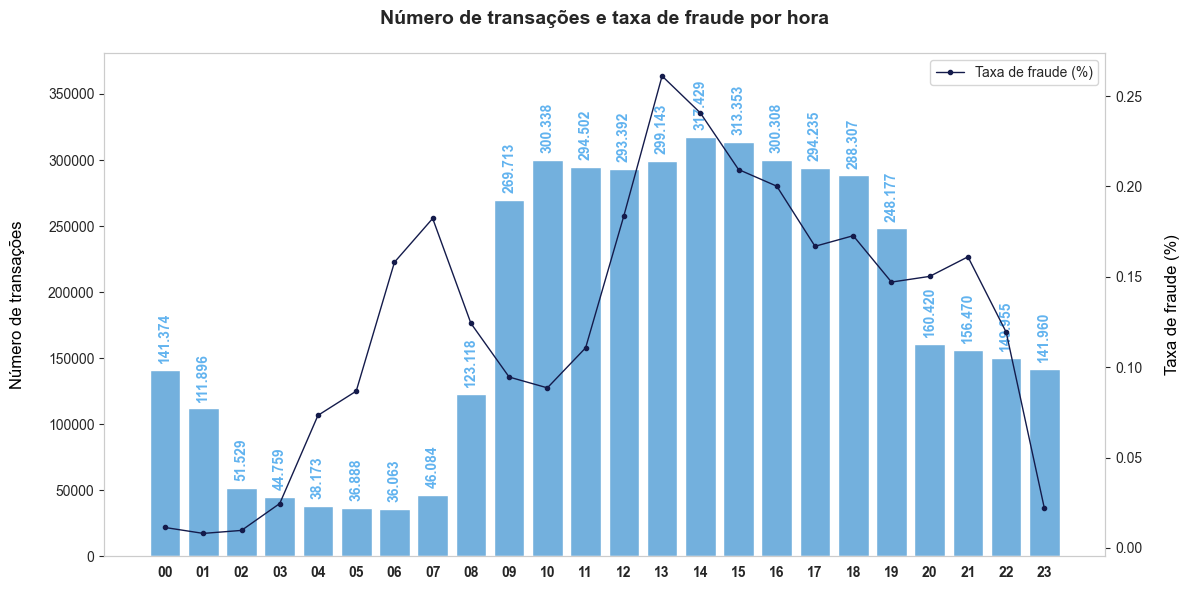

In [39]:
# Calculando a taxa de fraude por hora
df_plot_04 = df_train_val.groupby(df_train_val['date'].dt.hour).agg(
    total_transactions=('is_fraud', 'count'),
    fraudulent_transactions=('is_fraud', lambda x: (x == 'Yes').sum())
).reset_index()

# Renomeando a coluna para 'hour'
df_plot_04.rename(columns={'date': 'hour'}, inplace=True)
df_plot_04['hour_name'] = df_plot_04['hour'].apply(
    lambda x: pd.to_datetime(str(x), format='%H').strftime('%H'))

# Adicionando a coluna com a taxa de fraude (em porcentagem)
df_plot_04['fraud_rate'] = df_plot_04['fraudulent_transactions'] / df_plot_04['total_transactions']

# Ordenando os horas para garantir a ordem correta
df_plot_04 = df_plot_04.set_index('hour').sort_index().reset_index()

# Criando o gráfico de barras para transações por hora
plt.figure(figsize=(12, 6))
ax1 = sns.barplot(x=df_plot_04['hour_name'], y=df_plot_04['total_transactions'], palette=['#61b3ef'])

# Adicionando os valores nas barras
for p in ax1.patches:
    ax1.annotate(
        f'{int(p.get_height()):,}'.replace(',', '.'),  # Formatação com separador de milhar
        (p.get_x() + p.get_width() / 2, p.get_height()),  # Colocando o valor no topo da barra
        ha='center', va='bottom',  # Alinhamento
        fontsize=10, fontweight='bold',
        color='#61b3ef',
        xytext=(0, 5),  # Distância do texto para a barra
        textcoords='offset points',
        rotation=90  # Rotação do texto para vertical
    )

# Remover as linhas de grade
ax1.grid(False)

# Ajustando o limite do eixo y
ax1.set_ylim(0, df_plot_04['total_transactions'].max() * 1.2)  

# Ajustando o eixo x aplicando negrito
ax1.set_xticklabels(ax1.get_xticklabels(), fontweight='bold')
    
# Criando o segundo eixo y para a taxa de fraude
ax2 = ax1.twinx()
ax2.plot(df_plot_04['hour_name'], df_plot_04['fraud_rate'] * 100, marker='o', linestyle='-', 
         color='#141b4b', linewidth=1, markersize=3, label='Taxa de fraude (%)')

# Adiciona a legenda para o segundo eixo y
ax2.legend(loc='best')

# Adicionando título e rótulos
plt.title('Número de transações e taxa de fraude por hora\n', fontsize=14, fontweight='bold')
ax1.set_ylabel('Número de transações\n', color='black', fontsize=12)
ax1.set_xlabel('', color='black', fontsize=12)
ax2.set_ylabel('\nTaxa de fraude (%)', color='black', fontsize=12)

# Exibindo o gráfico
plt.tight_layout()
plt.grid(False)
plt.show()

**Insights Extraídos**

**Volume de transações por hora**
- O pico máximo de transações ocorre por volta das **14:00**, atingindo aproximadamente 317 mil transações.
- Um segundo pico significativo é registrado por volta das **10:00**, indicando dois momentos principais de atividade.
- O intervalo entre **02:00** e **07:00** apresenta as menores concentrações de transações.
- O volume de transações varia consideravelmente ao longo do dia, com maior atividade observada entre **09:00** e **19:00**, período de maior volume e engajamento dos usuários.

**Taxa de fraude por hora** 
- Os primeiros horários (entre **00:00** e **05:00**) exibem uma taxa de fraude mais elevada, mesmo com um volume de transações relativamente baixo.
- O pico máximo da taxa de fraude ocorre por volta das **13:00**.
- Durante o período de maior volume de transações pela manhã, entre **09:00** e **11:00**, observa-se uma leve queda na taxa de fraude.
- No período noturno, especialmente após as **21:00**, há uma redução significativa na taxa de fraude.

### 5.3. Distribuição das transações por localização do comerciante

#### 5.3.1. Distribuição das transações fraudulentas por cidade e estado/país do comerciante

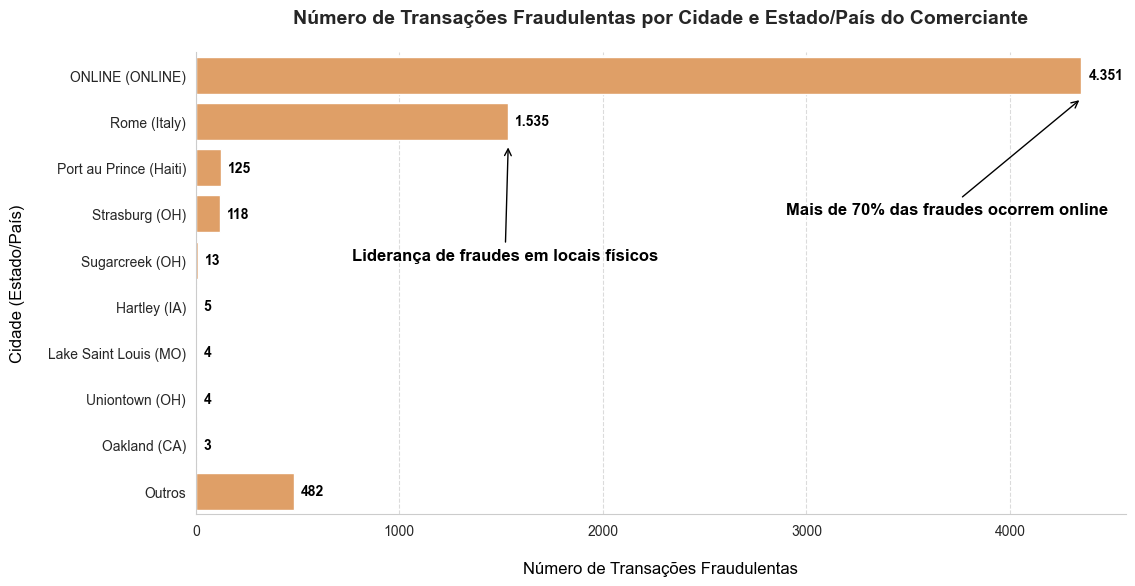

In [40]:
# Filtrando as transações fraudulentas
df_plot_05 = df_train_val[df_train_val['is_fraud'] == 'Yes']

# Criando uma nova coluna combinando cidade e estado/país
df_plot_05['city_state'] = df_plot_05['merchant_city'] + ' (' + df_plot_05['merchant_state'] + ')'

# Contagem de transações fraudulentas por cidade/estado
distribution = df_plot_05['city_state'].value_counts()

# Selecionando as 9 cidades com mais fraudes e agrupando as demais
top_cities = distribution.head(9)
other_cities = distribution.iloc[9:].sum()

# Adicionando categoria "Outros"
top_cities = pd.concat([top_cities, pd.Series({'Outros': other_cities})])

# Configuração do gráfico
plt.figure(figsize=(12, 6))

# Criando gráfico de barras horizontais
ax = sns.barplot(y=top_cities.index, x=top_cities.values, palette=['#f39e53'])

# Adicionando os valores nas barras
for p in ax.patches:
    ax.annotate(f'{int(p.get_width()):,}'.replace(',', '.'), 
                (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center', fontsize=10, fontweight='bold',
                color='black', xytext=(5, 0), textcoords='offset points')
    
# Destacando insights chave
ax.annotate('Mais de 70% das fraudes ocorrem online', xy=(top_cities.iloc[0], 0.5), 
            xytext=(top_cities.iloc[0] / 1.5, 3),
            arrowprops=dict(facecolor='black', edgecolor='black',arrowstyle='->'), 
            fontsize=12, fontweight='bold', color='black')
ax.annotate('Liderança de fraudes em locais físicos', xy=(top_cities.iloc[1], 1.5), 
            xytext=(top_cities.iloc[1] / 2, 4),
            arrowprops=dict(facecolor='black', edgecolor='black',arrowstyle='->'), 
            fontsize=12, fontweight='bold', color='black')

# Títulos e rótulos
plt.title('Número de Transações Fraudulentas por Cidade e Estado/País do Comerciante\n',
          fontsize=14, fontweight='bold')
plt.xlabel('\nNúmero de Transações Fraudulentas', color='black', fontsize=12)
plt.ylabel('Cidade (Estado/País)\n', color='black', fontsize=12)

# Removendo bordas extras
sns.despine()
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Exibir o gráfico
plt.show()


**Insights Extraídos**

**Distribuição concentrada em canais online**  
- Os canais online representam a maior fatia das transações fraudulentas, com **4.351** ocorrências.  
- Isso indica que **mais de 70% das fraudes ocorrem online**, evidenciando vulnerabilidades significativas nesse canal.

**Fraudes em locais físicos**  
- **Roma (Itália)** lidera entre os locais físicos, com **1.535** transações fraudulentas, destacando-se como um hotspot relevante para fraudes presenciais.  
- Outros locais, como **Port-au-Prince** (Haiti – 125) e **Strasburg** (OH – 118), também apresentam ocorrências, embora em volumes bem inferiores.  
- A categoria "Outros" soma **482** transações fraudulentas, mostrando que há uma diversidade de locais com incidências menores que, em conjunto, também demandam monitoramento.

#### 5.3.2. Distribuição das transações legítimas por cidade e estado/país do comerciante

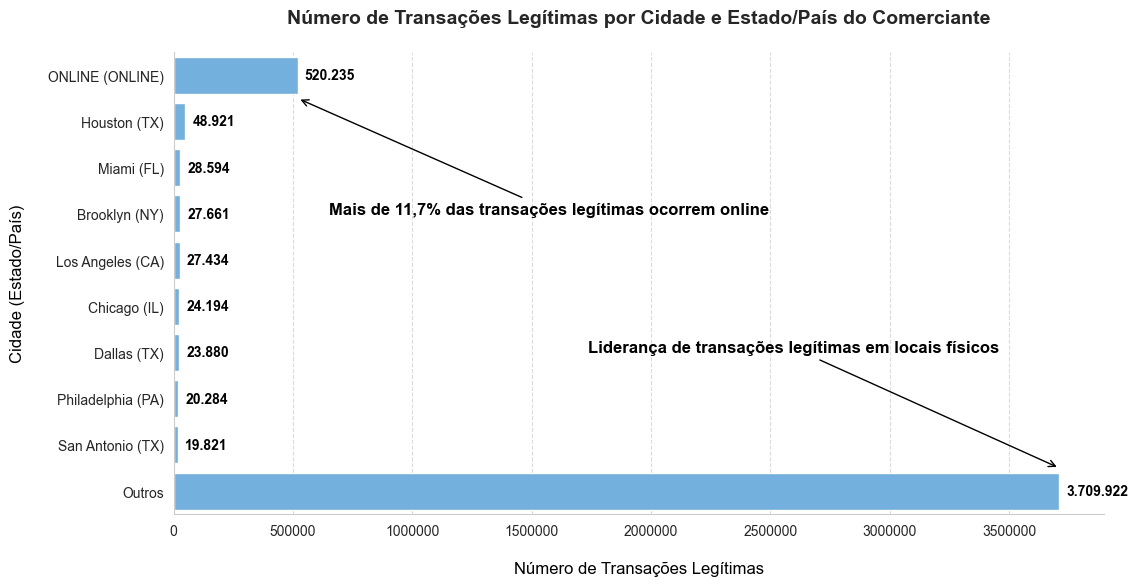

In [41]:
# Filtrando as transações legítimas
df_plot_06 = df_train_val[df_train_val['is_fraud'] == 'No']

# Criando uma nova coluna combinando cidade e estado/país
df_plot_06['city_state'] = df_plot_06['merchant_city'] + ' (' + df_plot_06['merchant_state'] + ')'

# Contagem de transações legítimas por cidade/estado
distribution = df_plot_06['city_state'].value_counts()

# Selecionando as 9 cidades com mais transações legítimas e agrupando as demais
top_cities = distribution.head(9)
other_cities = distribution.iloc[9:].sum()

# Adicionando categoria "Outros"
top_cities = pd.concat([top_cities, pd.Series({'Outros': other_cities})])

# Configuração do gráfico
plt.figure(figsize=(12, 6))

# Criando gráfico de barras horizontais
ax = sns.barplot(y=top_cities.index, x=top_cities.values, palette=['#61b3ef'])

# Adicionando os valores nas barras
for p in ax.patches:
    ax.annotate(f'{int(p.get_width()):,}'.replace(',', '.'), 
                (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center', fontsize=10, fontweight='bold',
                color='black', xytext=(5, 0), textcoords='offset points')
    
# Destacando insights chave
ax.annotate('Mais de 11,7% das transações legítimas ocorrem online', xy=(top_cities.iloc[0], 0.5), 
            xytext=(top_cities.iloc[0] / 0.8, 3),
            arrowprops=dict(facecolor='black', edgecolor='black',arrowstyle='->'), 
            fontsize=12, fontweight='bold', color='black')
ax.annotate('Liderança de transações legítimas em locais físicos', xy=(top_cities.iloc[9], 8.5), 
            xytext=(top_cities.iloc[0] / 0.3, 6),
            arrowprops=dict(facecolor='black', edgecolor='black',arrowstyle='->'), 
            fontsize=12, fontweight='bold', color='black')

# Títulos e rótulos
plt.title('Número de Transações Legítimas por Cidade e Estado/País do Comerciante\n',
          fontsize=14, fontweight='bold')
plt.xlabel('\nNúmero de Transações Legítimas', color='black', fontsize=12)
plt.ylabel('Cidade (Estado/País)\n', color='black', fontsize=12)

# Exibe rótulos sem notação científica
ax.ticklabel_format(style='plain', axis='x')

# Removendo bordas extras
sns.despine()
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Exibir o gráfico
plt.show()


**Insights extraídos**

**Distribuição Geográfica das Transações**  
- A categoria **"Outros"** concentra o maior volume de transações, totalizando **3.709.922**, o que indica que a maioria dos comerciantes está dispersa em localidades diversas, sem se restringir às grandes cidades específicas.
- O canal **ONLINE** representa **520.235** transações, ou seja, mais de **11,7%** do total de transações legítimas, destacando a importância crescente do comércio digital.
- Entre os pontos físicos, **Houston (TX)** é a cidade com o maior número de transações, somando **48.921**, seguida por outras grandes cidades como **Miami (FL)**, **Brooklyn (NY)** e **Los Angeles (CA)**, que registram volumes entre **20.000 e 30.000** transações.

**Principais Observações**  
- Embora os comerciantes em cidades específicas apresentem volumes de transações relativamente modestos, isso é compensado pela grande quantidade registrada na categoria "Outros", sugerindo uma dispersão geográfica significativa.
- O canal digital online, apesar de não ser o maior em termos absolutos, representa uma parcela relevante das transações legítimas, ressaltando sua crescente influência no mercado.

### 5.4. Distribuição das transações por forma de pagamento e a taxa de fraude

#### 5.4.1. Distribuição das transações por bandeira do cartão e a taxa de fraude

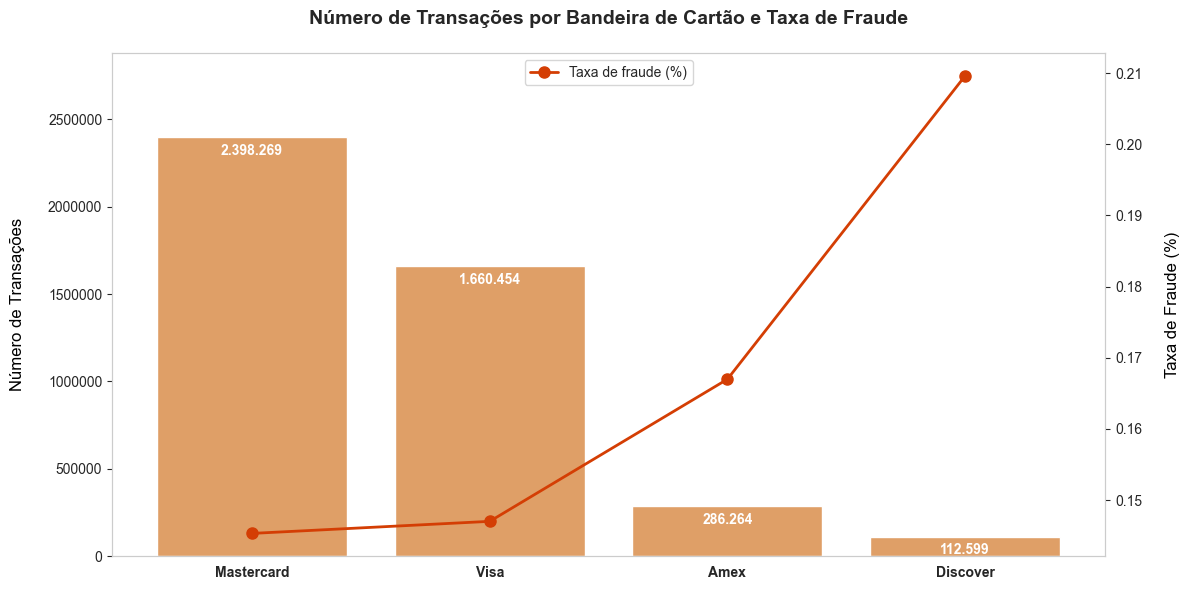

In [42]:
# Agrupando os dados por 'card_brand' para calcular as transações totais e fraudulentas
df_plot_07= df_train_val.groupby('card_brand').agg(
    total_transactions=('is_fraud', 'count'),
    fraudulent_transactions=('is_fraud', lambda x: (x == 'Yes').sum())
).reset_index()

# Adicionando a coluna com a taxa de fraude
df_plot_07['fraud_rate'] = \
    df_plot_07['fraudulent_transactions'] / df_plot_07['total_transactions']

# Ordenando os dados pela quantidade total de transações
df_plot_07 = df_plot_07.sort_values(by='total_transactions', ascending=False)

# Criando o gráfico de barras para o total de transações por bandeira
fig, ax1 = plt.subplots(figsize=(12, 6))

# Gráfico de barras para o número total de transações por bandeira
sns.barplot(x='card_brand', y='total_transactions', data=df_plot_07, palette=['#f39e53'], ax=ax1)

# Adicionando os valores nas barras
for p in ax1.patches:
    ax1.annotate(
        f'{int(p.get_height()):,}'.replace(',', '.'),  # Formatação com separador de milhar
        (p.get_x() + p.get_width() / 2, p.get_height()),  # Colocando o valor na barra
        ha='center', va='bottom',  # Alinhamento
        fontsize=10, fontweight='bold',
        color='white',
        xytext=(0, -15),  # Distância do texto para a barra
        textcoords='offset points'
    )
    
# Remover as linhas de grade
ax1.grid(False)

# Ajustando o limite do eixo y
ax1.set_ylim(0, df_plot_07['total_transactions'].max() * 1.2)  

# Ajustando o eixo x aplicando negrito
ax1.set_xticklabels(ax1.get_xticklabels(), fontweight='bold')

# Criando o segundo eixo y para a taxa de fraude
ax2 = ax1.twinx()
ax2.plot(df_plot_07['card_brand'], df_plot_07['fraud_rate'] * 100, marker='o',
         linestyle='-', color='#d43e04', linewidth=2, markersize=8, label='Taxa de fraude (%)')

# Adiciona a legenda para o segundo eixo y
ax2.legend(loc='upper center')

# Títulos e rótulos
ax1.set_title('Número de Transações por Bandeira de Cartão e Taxa de Fraude\n',
              fontsize=14, fontweight='bold')
ax1.set_xlabel('', color='black', fontsize=12)
ax1.set_ylabel('Número de Transações\n', color='black', fontsize=12)
ax2.set_ylabel('\nTaxa de Fraude (%)', color='black', fontsize=12)

# Exibe rótulos sem notação científica
ax1.ticklabel_format(style='plain', axis='y')

# Exibindo o gráfico
plt.tight_layout()
plt.grid(False)
plt.show()

**Insights extraídos**

**Mastercard e Visa dominam o volume de transações**  
- A **Mastercard** lidera com o maior número de transações, totalizando **2.398.269**, seguida pela **Visa**, com **1.660.454** transações.  
- As bandeiras **Amex** e **Discover** apresentam volumes significativamente menores, com **286.264** e **112.599** transações, respectivamente.

**Taxa de fraude aumenta em bandeiras com menor volume**  
- Apesar de representarem a maior parte das transações, **Mastercard** e **Visa** registram as menores taxas de fraude.  
- Por outro lado, **Amex** e **Discover**, com menores volumes de transações, exibem taxas de fraude mais elevadas.

**Possíveis interpretações**  
- **Mastercard** e **Visa** podem contar com **sistemas antifraude mais robustos**, o que contribui para a redução das transações fraudulentas.  
- **Amex** e **Discover**, com um volume menor de transações, podem ser **mais suscetíveis a ataques de fraudadores** ou ter **menos investimentos em segurança**.  
- Outra possibilidade é que essas bandeiras sejam mais utilizadas em **tipos de transações mais vulneráveis** a fraudes, como compras de alto risco ou transações internacionais.

#### 5.4.2. Distribuição das transações por tipo de cartão e a taxa de fraude

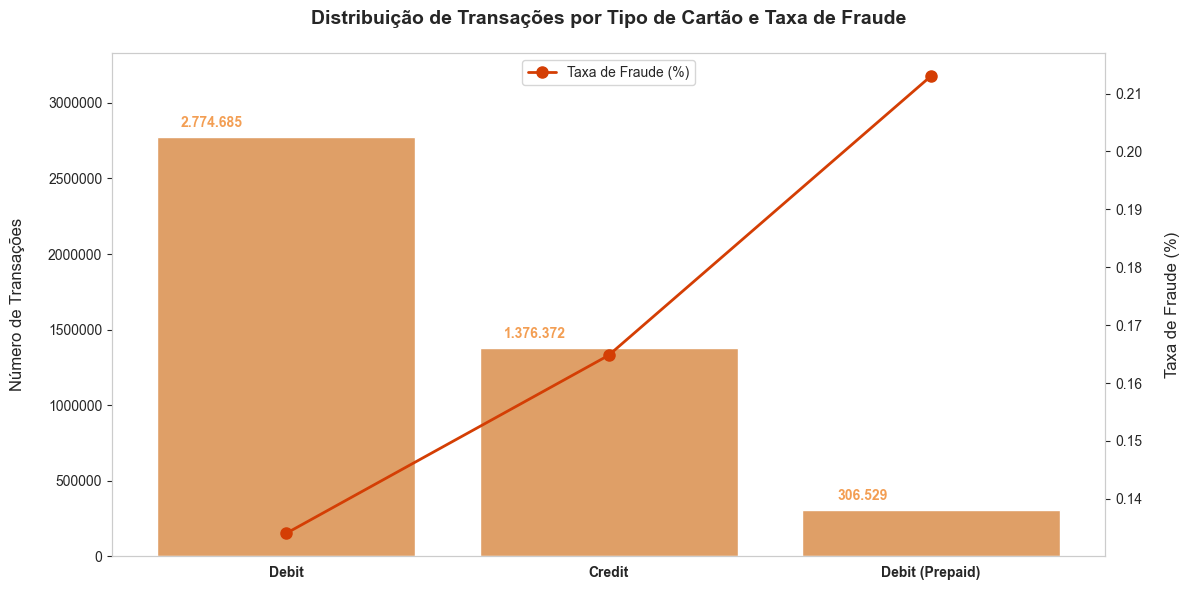

In [43]:
# Agrupando os dados por 'card_type' para calcular as transações totais e fraudulentas
df_plot_08 = df_train_val.groupby('card_type').agg(
    total_transactions=('is_fraud', 'count'),
    fraudulent_transactions=('is_fraud', lambda x: (x == 'Yes').sum())
).reset_index()

# Calculando a taxa de fraude para cada tipo de cartão
df_plot_08['fraud_rate'] = \
    df_plot_08['fraudulent_transactions'] / df_plot_08['total_transactions']

# Ordenando os dados pela quantidade total de transações
df_plot_08 = df_plot_08.sort_values(by='total_transactions', ascending=False)

# Criando o gráfico de barras para o total de transações por tipo de cartão
fig, ax1 = plt.subplots(figsize=(12, 6))

# Gráfico de barras para o número total de transações por tipo de cartão
sns.barplot(x='card_type', y='total_transactions', data=df_plot_08, palette=['#f39e53'], ax=ax1)

# Adicionando os valores nas barras
for p in ax1.patches:
    ax1.annotate(
        f'{int(p.get_height()):,}'.replace(',', '.'),  # Formatação com separador de milhar
        (p.get_x() + p.get_width() / 3, p.get_height()),  # Colocando o valor na barra
        ha='right', va='bottom',  # Alinhamento
        fontsize=10, fontweight='bold',
        color='#f39e53',
        xytext=(0, 5),  # Distância do texto para a barra
        textcoords='offset points'
    )
    
# Remover as linhas de grade
ax1.grid(False)

# Ajustando o limite do eixo y
ax1.set_ylim(0, df_plot_08['total_transactions'].max() * 1.2)  

# Ajustando o eixo x aplicando negrito
ax1.set_xticklabels(ax1.get_xticklabels(), fontweight='bold')

# Criando o segundo eixo y para a taxa de fraude
ax2 = ax1.twinx()
ax2.plot(df_plot_08['card_type'], df_plot_08['fraud_rate'] * 100, marker='o', 
         linestyle='-', color='#d43e04', linewidth=2, markersize=8, label='Taxa de Fraude (%)')

# Adiciona a legenda para o segundo eixo y
ax2.legend(loc='upper center')

# Títulos e rótulos
ax1.set_title('Distribuição de Transações por Tipo de Cartão e Taxa de Fraude\n', 
              fontsize=14, fontweight='bold')
ax1.set_xlabel('', fontsize=12)
ax1.set_ylabel('Número de Transações\n', fontsize=12)
ax2.set_ylabel('\nTaxa de Fraude (%)', fontsize=12)

# Exibe rótulos sem notação científica
ax1.ticklabel_format(style='plain', axis='y')

# Exibindo o gráfico
plt.tight_layout()
plt.grid(False)
plt.show()

**Insights extraídos**

**Distribuição das Transações por Tipo de Cartão**  
- O tipo de cartão **Débito** lidera o volume de transações, com cerca de **2,77 milhões**, seguido pelo **Crédito**, com aproximadamente **1,38 milhão**.  
- Os cartões **Débito (Prepaid)** têm um volume bem menor, com cerca de **306 mil** transações.

**Taxa de Fraude é Maior em Cartões de Débito Pré-pago**  
- Apesar de apresentarem o menor volume de transações, os cartões **Débito (Prepaid)** possuem a maior taxa de fraude, superior a **20%**.  
- Isso pode sugerir que fraudadores consideram os cartões pré-pagos mais vulneráveis a exploração, ou que esses cartões possuem **menos controles de segurança**.

**Cartões de Crédito e Débito**  
- Embora o cartão de **Crédito** registre menos transações que o de **Débito**, ele apresenta uma taxa de fraude ligeiramente superior (aproximadamente **10%** contra **8%** para débito, conforme o gráfico).  
- A maior exposição a **compras online** ou transações de maior risco pode ser um fator que contribui para essa diferença nas taxas de fraude.

**Possíveis Motivos**  
- Os cartões **Débito (Prepaid)** podem ser mais utilizados em **transações pontuais ou em situações com menor verificação de identidade**, o que os torna mais vulneráveis à fraude.  
- Embora os **cartões de crédito** ofereçam sistemas de proteção ao consumidor mais robustos, eles podem ser **mais expostos a fraudes em compras online**, devido à natureza das transações e ao maior risco envolvido.

### 5.5. Distribuição das transações por faixa etária e taxa de fraude

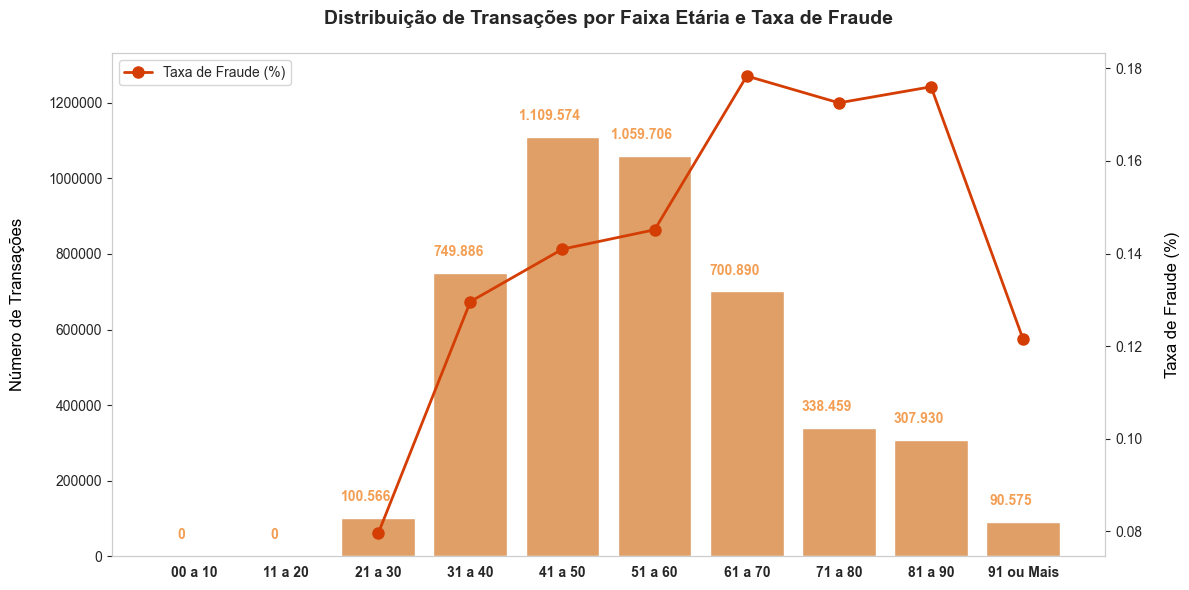

In [44]:
# Definindo os limites e rótulos para as faixas etárias
bins_1 = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, float('inf')]
labels_1 = ['00 a 10', '11 a 20', '21 a 30', '31 a 40', '41 a 50', '51 a 60',
            '61 a 70', '71 a 80', '81 a 90', '91 ou Mais']

# Criando a variável de faixas etárias
df_train_val['age_group_numeric'] = pd.cut(df_train_val['current_age'], 
                                           bins=bins_1, labels=labels_1, right=False)

# Agrupando os dados por 'age_group_numeric' para calcular as transações totais e fraudulentas
df_plot_09 = df_train_val.groupby('age_group_numeric').agg(
    total_transactions=('is_fraud', 'count'),
    fraudulent_transactions=('is_fraud', lambda x: (x == 'Yes').sum())
).reset_index()

# Calculando a taxa de fraude para cada faixa etária
df_plot_09['fraud_rate'] = \
    df_plot_09['fraudulent_transactions'] / df_plot_09['total_transactions']

# Criando o gráfico de barras para o total de transações por faixa etária
fig, ax1 = plt.subplots(figsize=(12, 6))

# Gráfico de barras para o número total de transações por faixa etária
sns.barplot(x='age_group_numeric', y='total_transactions', data=df_plot_09, palette=['#f39e53'], ax=ax1)

# Adicionando os valores nas barras
for p in ax1.patches:
    ax1.annotate(
        f'{int(p.get_height()):,}'.replace(',', '.'),  # Formatação com separador de milhar
        (p.get_x() + p.get_width() / 3, p.get_height()),  # Colocando o valor na barra
        ha='center', va='bottom',  # Alinhamento
        fontsize=10, fontweight='bold',
        color='#f39e53',
        xytext=(0, 10),  # Distância do texto para a barra
        textcoords='offset points'
    )
    
# Remover as linhas de grade
ax1.grid(False)

# Ajustando o limite do eixo y
ax1.set_ylim(0, df_plot_09['total_transactions'].max() * 1.2)  

# Ajustando o eixo x aplicando negrito
ax1.set_xticklabels(ax1.get_xticklabels(), fontweight='bold')

# Criando o segundo eixo y para a taxa de fraude
ax2 = ax1.twinx()
ax2.plot(df_plot_09['age_group_numeric'], df_plot_09['fraud_rate'] * 100,  marker='o', 
         linestyle='-', color='#d43e04', linewidth=2, markersize=8, label='Taxa de Fraude (%)')

# Adiciona a legenda para o segundo eixo y
ax2.legend(loc='upper left')

# Títulos e rótulos
ax1.set_title('Distribuição de Transações por Faixa Etária e Taxa de Fraude\n',
              fontsize=14, fontweight='bold')
ax1.set_xlabel('', color='black', fontsize=12)
ax1.set_ylabel('Número de Transações\n', color='black', fontsize=12)
ax2.set_ylabel('\nTaxa de Fraude (%)', color='black', fontsize=12)

# Exibe rótulos sem notação científica
ax1.ticklabel_format(style='plain', axis='y')

# Exibindo o gráfico
plt.tight_layout()
plt.grid(False)
plt.show()

**Insights extraídos**

**Faixa Etária de Maior Volume de Transações**  
- A faixa etária de **31 a 40 anos** lidera em número de transações, seguida de perto pelas faixas **41 a 50** e **21 a 30 anos**.  
- Esse padrão pode refletir o perfil econômico de adultos em plena fase produtiva, que tendem a realizar mais compras e movimentações financeiras.

**Faixas Etárias com Maior Taxa de Fraude**  
- A taxa de fraude apresenta um **aumento significativo** a partir dos **50 anos**, alcançando seu pico na faixa etária de **71 a 80 anos**.  
- Em seguida, há uma leve redução, mas as taxas continuam elevadas para as faixas de **81 a 90 anos** e **91 anos ou mais**.  
- Isso sugere que **pessoas mais velhas** podem ser mais vulneráveis a fraudes, seja pela menor familiaridade com a tecnologia ou por serem **alvos preferenciais de fraudadores**.

**Diminuição do Volume de Transações em Idades Avançadas**  
- Embora a taxa de fraude seja mais alta entre as faixas etárias mais avançadas, o **volume de transações** diminui significativamente para indivíduos acima de **60 anos**.  
- Esse contraste (menor volume de transações, mas maior proporção de fraudes) destaca a necessidade de **maior atenção e proteção** para esse público, que pode ser mais suscetível a golpes.

### 5.6. Distribuição das transações por faixa de pontuação de crédito e taxa de fraude

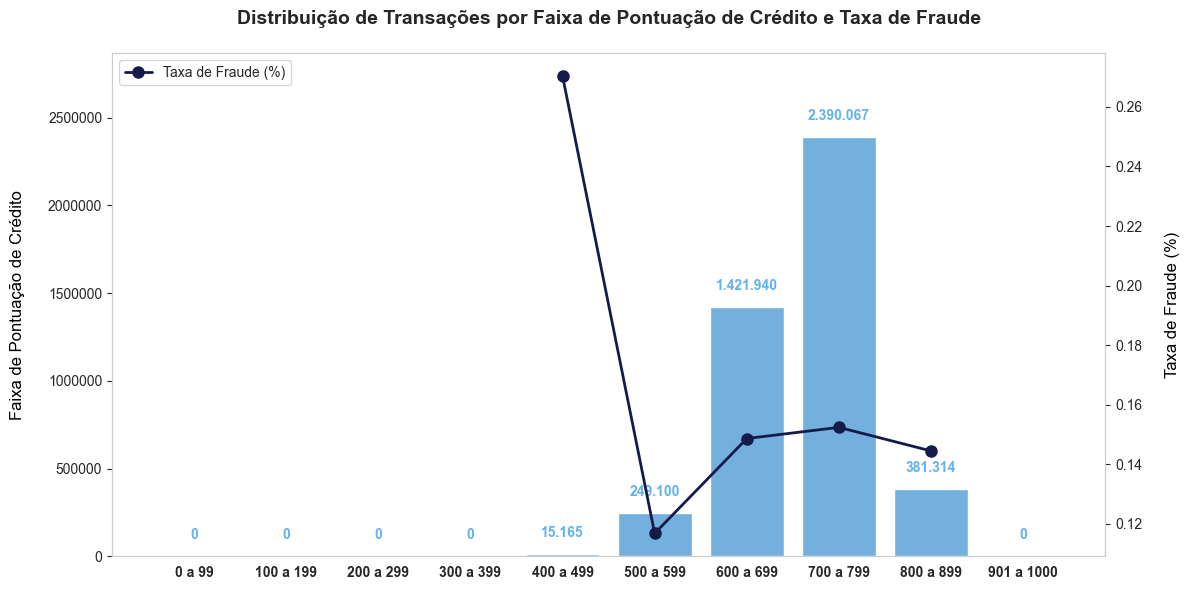

In [45]:
# Definindo os limites das faixas e scores
bins = list(range(0, 1001, 100))

# Definindo os rótulos das faixas
labels = [f'{i} a {i+99}' for i in range(0, 900, 100)] + ['901 a 1000']

# Criando a variável 'credit_score_group'
df_train_val['credit_score_group'] = pd.cut(df_train_val['credit_score'], 
                                            bins=bins, labels=labels, right=False)

# Agrupando os dados por 'credit_score_group' para calcular as transações totais e fraudulentas
df_plot_10 = df_train_val.groupby('credit_score_group').agg(
    total_transactions=('is_fraud', 'count'),
    fraudulent_transactions=('is_fraud', lambda x: (x == 'Yes').sum())
).reset_index()

# Calculando a taxa de fraude para cada grupo de pontuação de crédito
df_plot_10['fraud_rate'] = \
    df_plot_10['fraudulent_transactions'] / df_plot_10['total_transactions']

# Criando o gráfico de barras para o total de transações por grupo de pontuação de crédito
fig, ax1 = plt.subplots(figsize=(12, 6))

# Gráfico de barras para o número total de transações por grupo de pontuação de crédito
sns.barplot(x='credit_score_group', y='total_transactions', data=df_plot_10, palette=['#61b3ef'], ax=ax1)

# Adicionando os valores nas barras
for p in ax1.patches:
    ax1.annotate(
        f'{int(p.get_height()):,}'.replace(',', '.'),  # Formatação com separador de milhar
        (p.get_x() + p.get_width() / 2, p.get_height()),  # Colocando o valor na barra
        ha='center', va='bottom',  # Alinhamento
        fontsize=10, fontweight='bold',
        color='#61b3ef',
        xytext=(0, 10),  # Distância do texto para a barra
        textcoords='offset points'
    )
    
# Remover as linhas de grade
ax1.grid(False)

# Ajustando o limite do eixo y
ax1.set_ylim(0, df_plot_10['total_transactions'].max() * 1.2)  

# Ajustando o eixo x aplicando negrito
ax1.set_xticklabels(ax1.get_xticklabels(), fontweight='bold')

# Criando o segundo eixo y para a taxa de fraude
ax2 = ax1.twinx()
ax2.plot(df_plot_10['credit_score_group'], df_plot_10['fraud_rate'] * 100, marker='o', 
         linestyle='-', color='#141b4b', linewidth=2, markersize=8, label='Taxa de Fraude (%)')

# Adiciona a legenda para o segundo eixo y
ax2.legend(loc='upper left')

# Títulos e rótulos
ax1.set_title('Distribuição de Transações por Faixa de Pontuação de Crédito e Taxa de Fraude\n', 
              fontsize=14, fontweight='bold')
ax1.set_xlabel('', color='black', fontsize=12)
ax1.set_ylabel('Faixa de Pontuação de Crédito\n', color='black', fontsize=12)
ax2.set_ylabel('\nTaxa de Fraude (%)', color='black', fontsize=12)

# Exibe rótulos sem notação científica
ax1.ticklabel_format(style='plain', axis='y')

# Exibindo o gráfico
plt.tight_layout()
plt.grid(False)
plt.show()

**Insights extraídos**

**Maior Volume de Transações em Faixa de Pontuação Mediana-Alta (700-799)**  
- A faixa de **700 a 799** concentra o maior número de transações, com **2.390.067** transações registradas.  
- Em seguida, destacam-se as faixas de **600 a 699** e **800 a 899**.  
- Isso sugere que a maioria dos clientes apresenta pontuações de crédito dentro da faixa mediana a alta.

**Relação Inversa entre Pontuação de Crédito e Taxa de Fraude**  
- A taxa de fraude é **mais alta** nas faixas de pontuação **mais baixas** (por exemplo, abaixo de 600).  
- À medida que a pontuação de crédito aumenta, a taxa de fraude tende a **diminuir** de maneira significativa.  
- Esse padrão está alinhado com as práticas do mercado, onde clientes com pontuação de crédito mais baixa são geralmente associados a maior risco de inadimplência, o que pode aumentar sua vulnerabilidade a fraudes ou torná-los alvos mais frequentes.

**Faixas de Crédito Elevadas (800-899) com Menor Fraude**  
- Apesar de apresentarem um volume considerável de transações, as faixas de crédito acima de **800** têm **taxas de fraude significativamente mais baixas** em comparação com as faixas inferiores.  
- Clientes com pontuação de crédito elevada geralmente possuem um perfil financeiro mais estável, o que pode reduzir a exposição a fraudes.

**Possíveis Interpretações**  
- **Políticas de Risco**: Instituições financeiras podem adotar **limites de segurança mais rigorosos** para clientes com pontuação de crédito baixa, mas, apesar disso, esse grupo tende a representar um risco maior.  
- **Perfil de Comportamento**: Indivíduos com pontuação de crédito mais baixa podem estar mais expostos a fraudes, seja por **menor familiaridade com práticas de segurança** ou por realizarem transações em **canais mais arriscados**.

### 5.7. Distribuição das transações por indicadores e taxa de fraude

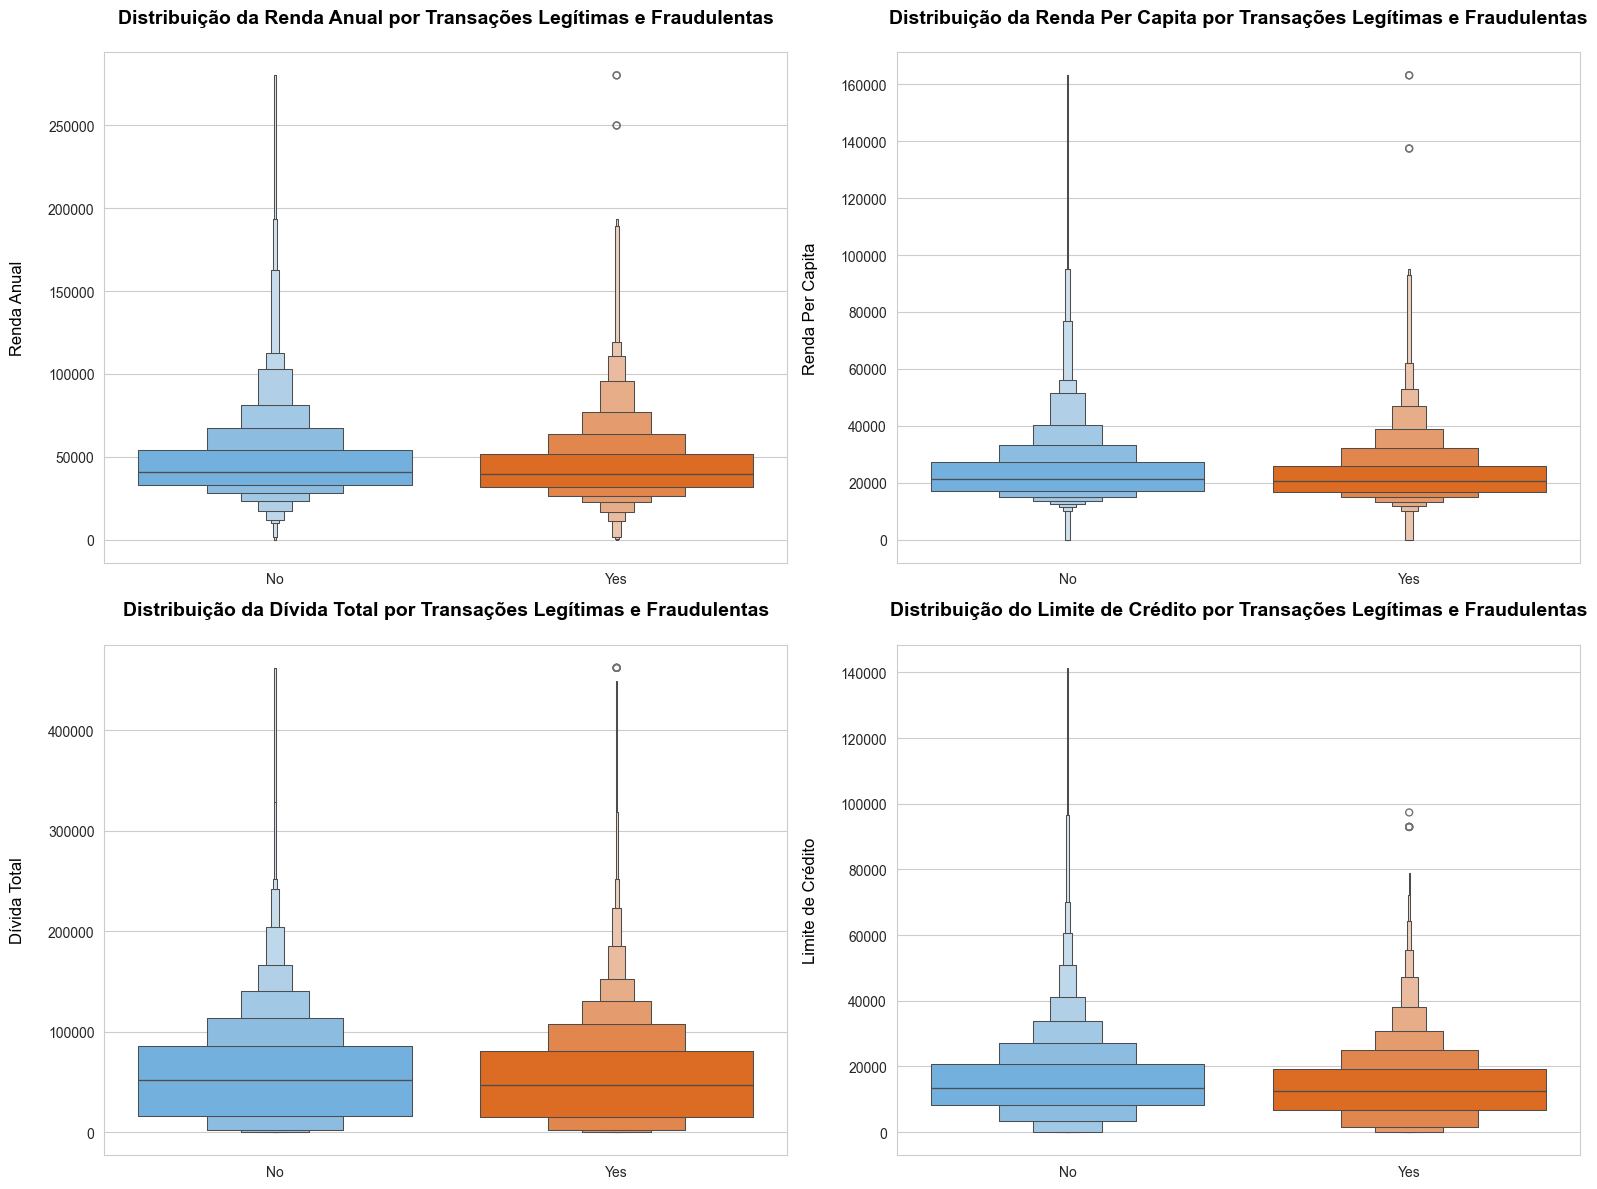

In [46]:
# Ajustando o estilo
plt.figure(figsize=(16, 12))

# Cores para 'Não Fraude' e 'Fraude'
cores = ['#61b3ef', '#fb6404']

# Subgráfico para 'yearly_income' vs 'is_fraud'
plt.subplot(2, 2, 1)
sns.boxenplot(x='is_fraud', y='yearly_income', data=df_train_val, palette=cores)
plt.title('Distribuição da Renda Anual por Transações Legítimas e Fraudulentas\n', 
          fontsize=14, fontweight='bold', color='black')
plt.xlabel('', color='black', fontsize=12)
plt.ylabel('Renda Anual\n', color='black', fontsize=12)

# Subgráfico para 'per_capita_income' vs 'is_fraud'
plt.subplot(2, 2, 2)
sns.boxenplot(x='is_fraud', y='per_capita_income', data=df_train_val, palette=cores)
plt.title('Distribuição da Renda Per Capita por Transações Legítimas e Fraudulentas\n', 
          fontsize=14, fontweight='bold', color='black')
plt.xlabel('', color='black', fontsize=12)
plt.ylabel('Renda Per Capita\n', color='black', fontsize=12)

# Subgráfico para 'total_debt' vs 'is_fraud'
plt.subplot(2, 2, 3)
sns.boxenplot(x='is_fraud', y='total_debt', data=df_train_val, palette=cores)
plt.title('Distribuição da Dívida Total por Transações Legítimas e Fraudulentas\n', 
          fontsize=14, fontweight='bold', color='black')
plt.xlabel('', color='black', fontsize=12)
plt.ylabel('Dívida Total\n', color='black', fontsize=12)

# Subgráfico para 'credit_limit' vs 'is_fraud'
plt.subplot(2, 2, 4)
sns.boxenplot(x='is_fraud', y='credit_limit', data=df_train_val, palette=cores)
plt.title('Distribuição do Limite de Crédito por Transações Legítimas e Fraudulentas\n', 
          fontsize=14, fontweight='bold', color='black')
plt.xlabel('', color='black', fontsize=12)
plt.ylabel('Limite de Crédito\n', color='black', fontsize=12)

# Ajustando o layout para que não sobreponham
plt.tight_layout()
plt.show()

**Insights extraídos**

**Distribuição da Renda Anual**  
- As transações legítimas (em azul) apresentam uma distribuição com **valores de renda anual mais elevados** e maior dispersão.  
- Em contraste, as transações fraudulentas (em laranja) se concentram em **valores de renda anual mais baixos**, sugerindo que os fraudadores podem estar associados a **perfis com renda inferior**.

**Distribuição da Renda Per Capita**  
- A renda per capita nas transações legítimas tende a ser **mais alta** e apresenta uma **variação mais ampla**.  
- Nas transações fraudulentas, a distribuição é **concentrada em faixas de renda mais baixas**, indicando possíveis **diferenças socioeconômicas** entre os dois grupos.

**Distribuição da Dívida Total**  
- A análise da **dívida total** revela que as transações legítimas exibem uma **maior variação**, enquanto as transações fraudulentas mostram uma **concentração em determinados valores**, sugerindo um padrão de endividamento **mais consistente** entre os fraudadores.

**Distribuição do Limite de Crédito**  
- As transações fraudulentas tendem a operar com **limites de crédito mais baixos** ou apresentam uma **distribuição distinta** em comparação com as transações legítimas, o que pode ser útil para **identificar perfis de risco** específicos.

### 5.8. Distribuição das transações por erros de transação e taxa de fraude

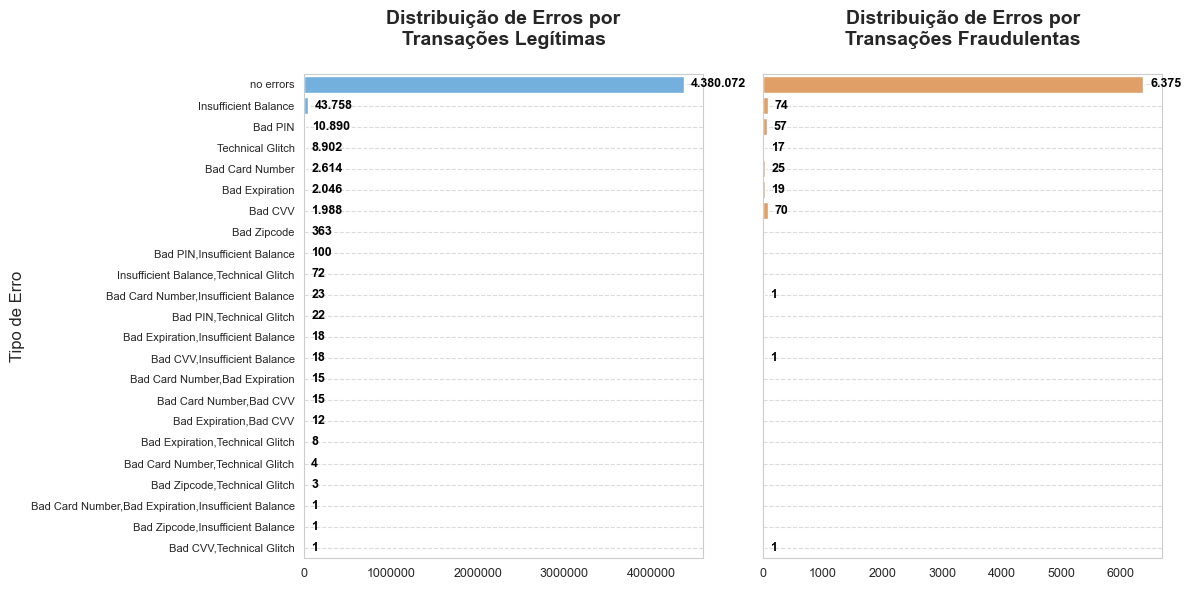

In [47]:
# Função para gerar gráficos de barras com a distribuição de erros por tipo
# para transações legítimas ou fraudulentas.

def gerar_grafico_barplot(data, ax, color, title):
    '''
    Função para gerar gráficos de barras com a distribuição de erros por tipo
    para transações legítimas ou fraudulentas.

    :param data: DataFrame
        DataFrame contendo as contagens de erros e suas respectivas quantidades.
    :param ax: matplotlib.axes.Axes
        O eixo (ax) onde o gráfico será plotado.
    :param color: str
        Cor do gráfico (usada para diferenciar entre transações legítimas e fraudulentas).
    :param title: str
        Título a ser exibido no gráfico.
    '''
    sns.barplot(data=data, y='errors', x='count', palette=[color], ax=ax)
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.set_xlabel('', fontsize=12)
    ax.set_ylabel('Tipo de Erro', fontsize=12)
    ax.tick_params(axis='y', labelsize=8)
    ax.tick_params(axis='x', labelsize=9)
    
    # Adiciona os valores no final das barras
    for p in ax.patches:
        ax.annotate(
            f'{int(p.get_width()):,}'.replace(',', '.'),  # Formatação com separador de milhar
            (p.get_width(), p.get_y() + p.get_height() / 2),
            ha='left', va='center',
            fontsize=9, fontweight='bold',
            color='black',
            xytext=(5, 0),
            textcoords='offset points'
        )
    
    # Removendo as linhas verticais da grade
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.grid(axis='x', visible=False)  # Remover as linhas verticais

    # Exibe rótulos sem notação científica
    ax.ticklabel_format(style='plain', axis='x')


# Filtrando os dados para transações legítimas e fraudulentas
df_no_fraud = df_train_val[df_train_val['is_fraud'] == 'No']
df_yes_fraud = df_train_val[df_train_val['is_fraud'] == 'Yes']

# Contagem de erros para transações legítimas e fraudulentas
contagem_no_fraud = df_no_fraud['errors'].value_counts().reset_index()
contagem_yes_fraud = df_yes_fraud['errors'].value_counts().reset_index()

# Renomeando as colunas para facilitar
contagem_no_fraud.columns = ['errors', 'count']
contagem_yes_fraud.columns = ['errors', 'count']

# Criando a figura
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), sharey=True)

# Gerando os barplots
gerar_grafico_barplot(contagem_no_fraud, axes[0], '#61b3ef', 
                      'Distribuição de Erros por\nTransações Legítimas\n')
gerar_grafico_barplot(contagem_yes_fraud, axes[1], '#f39e53', 
                      'Distribuição de Erros por\nTransações Fraudulentas\n')

# Exibindo o gráfico
plt.tight_layout()
plt.show()

**Insights extraídos**

**Distribuição dos Erros em Transações Legítimas**  
- A grande maioria das transações legítimas não apresenta erros, com **4.380.072 ocorrências** sem falhas, o que sugere um processamento **geralmente bem-sucedido**.  
- Os erros mais comuns incluem **“Insufficient Balance”** (43.758), **“Bad PIN”** (10.890) e **“Technical Glitch”** (8.902).  
- Erros como **“Bad Card Number”**, **“Bad Expiration”** e **“Bad CVV”** ocorrem com **frequências muito menores**.  
- Ocorrências de **erros combinados** (como “Bad PIN, Insufficient Balance”) são raras, indicando que, em sua maioria, os problemas são **isolados**.

**Distribuição dos Erros em Transações Fraudulentas**  
- Em comparação, as transações fraudulentas têm um número muito menor de erros, com **“no errors”** registrando apenas **6.375 ocorrências**.  
- Os erros mais frequentes incluem **“Insufficient Balance”** (74), **“Bad PIN”** (57), **“Bad CVV”** (70) e **“Technical Glitch”** (17), todos **em ordens de magnitude inferiores** aos erros encontrados nas transações legítimas.  
- Apesar de esses números serem pequenos, a **distribuição dos erros** pode indicar padrões específicos que, proporcionalmente, diferem em relação ao volume total das transações fraudulentas.

### 5.9. Correlação entre as variáveis numéricas

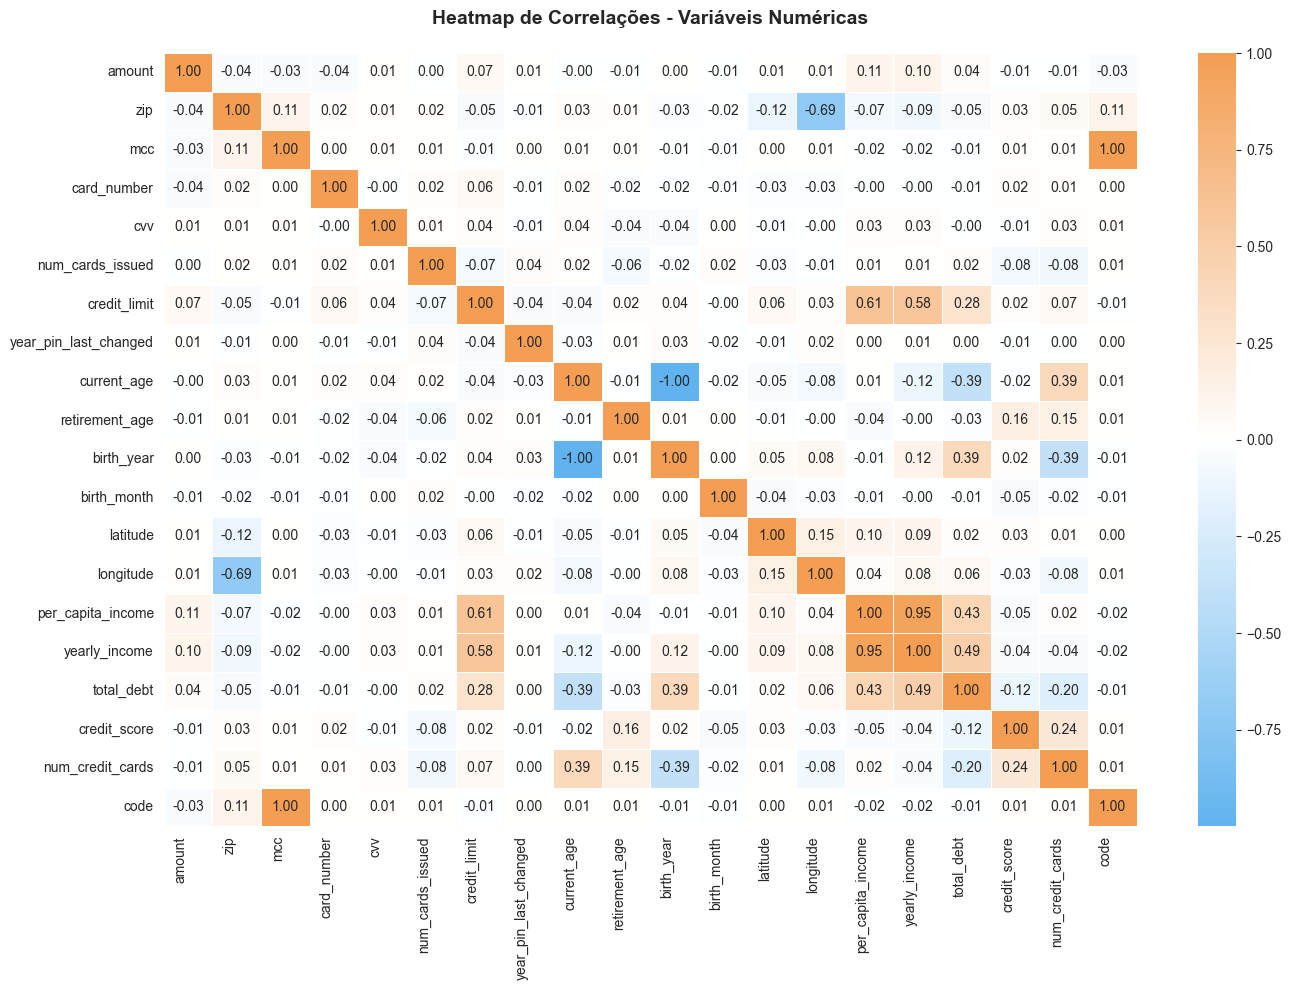

In [48]:
# Definindo a paleta personalizada
cores_personalizadas = LinearSegmentedColormap.from_list('CustomCoolWarm', ['#61b3ef', 'white', '#f39e53'])

# Filtrando colunas que não possuem 'id' no nome
cols_sem_id = [col for col in df_train_val.columns if 'id' not in col.lower()]

# Calculando a matriz de correlação apenas com as variáveis filtradas
corr_matrix = df_train_val[cols_sem_id].corr(numeric_only=True)

# Configurando o tamanho do gráfico
plt.figure(figsize=(14, 10))

# Plotando o heatmap de correlação com a nova paleta
sns.heatmap(corr_matrix, annot=True, cmap=cores_personalizadas, fmt='.2f', linewidths=0.5, cbar=True)

# Ajustando o título e os rótulos
plt.title('Heatmap de Correlações - Variáveis Numéricas\n', fontsize=14, fontweight='bold')
plt.xticks(rotation=90, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


## 6. Conclusões